# **Crafting Clusters: Unveiling Beer Recipe Patterns with Machine Learning**

>[Crafting Clusters: Unveiling Beer Recipe Patterns with Machine Learning](#scrollTo=pY9yEf4rlI9l)

>[Introduction](#scrollTo=EkN0i3copqGz)

>[Objective](#scrollTo=b7MPEViOFHiw)

>[Setting Up](#scrollTo=_AmPbjpoHN0i)

>>>[Installation of Pre-Requisite Libraries](#scrollTo=XrRHqvAtd6fS)

>[Data Description](#scrollTo=ilIcF8qfKgSY)

>>>[Plotting Frequency of Non Categorical Variable](#scrollTo=aFpdDRqTGWKA)

>[Data Preprocessing](#scrollTo=6b_C3UHkBeEt)

>>>[Defining Categorical & Non-Categorical Variables](#scrollTo=J3ZzVJDQz06O)

>>>[Missing Data Information](#scrollTo=_ZeeS1DG0Sng)

>>>[Missing Data Treatment](#scrollTo=ml25FKzY11Fg)

>>>[Missing Data Exclusion](#scrollTo=oFmjWiQ-1_i2)

>>>[Numeric Coding of Data](#scrollTo=BxlJLA6l2EnF)

>>>[Checking for Outliers](#scrollTo=0cWuJ_wJ2MFK)

>>>[Treatment of Outliers](#scrollTo=l4aSCVE32UU6)

>>>[Data Bifurcation into Training & Testing Datasets](#scrollTo=-hfCsLub2f3_)

>[Clustering](#scrollTo=5WQwxUIRJIei)

>>[Assessment Criteria](#scrollTo=5nc-XY9qDrK7)

>>[K-Means Clustering](#scrollTo=As6_eyZ4VudU)

>>>[Determining Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia](#scrollTo=zcCMjSnv4AkX)

>>>[Model Performance](#scrollTo=KDKXTxTmVxL1)

>>>[Cluster Profile](#scrollTo=Fk9fjIvcPyS_)

>>>[Results](#scrollTo=trc7L1I_5oc_)

>>[Gaussian Mixture Model](#scrollTo=FiuJtiEpSW-h)

>>>[Methodology](#scrollTo=D0ZueF2drRFy)



# **Introduction**


> The world of beer encompasses a kaleidoscope of flavors and styles, each boasting a unique set of characteristics. This project delves into the exciting prospect of analyzing these styles through the power of machine learning, specifically by employing clustering algorithms.
By harnessing this dataset, we aim to uncover the inherent structures within this data and identify distinct groups, or clusters, of recipes that share similar features.

> This project focuses on two distinct clustering algorithms: K-means Clustering and Gaussian Mixture Model. By analyzing their performance comparatively, we seek to understand the underlying relationships between various beer styles. This comparative approach will not only shed light on the effectiveness of each algorithm in this context but also provide valuable insights into the organization and classification of beer recipes based on their core characteristics.

> Ultimately, this exploration aspires to contribute to the ongoing efforts to characterize and understand the ever-evolving landscape of beer styles. By extracting non-obvious insights from the data, we hope to inform decisions like identifying unique beer profiles for targeted marketing, predicting consumer preferences, or guiding new beer development based on famous clusters.


# **Objective**

1. Define the problem statement and segment the dataset into meaningful subsets based on beer recipe attributes.
2. Determine the appropriate number of segments or clusters within the dataset to effectively group similar beer recipes together.
3. Select and implement an appropriate clustering model, considering both K-Means as the base model and an alternative algorithm such as Gaussian Mixture Model.
4. Identify and analyze the clusters to determine if they are homogeneous (similar within clusters) or heterogeneous (differentiated between clusters), gaining insights into the diversity and patterns within beer recipes.

# **Setting Up**

### Installation of Pre-Requisite Libraries

In [ ]:
pip  install memory_profiler

In [ ]:
# @title Setup
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from itertools import cycle, islice
from sklearn.cluster import KMeans as kmclus # For K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
from pandas.plotting import parallel_coordinates
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering

!pip install ipython-autotime
%reload_ext autotime

# Load IPython extension for memory profiling
!pip install memory-profiler
%reload_ext memory_profiler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.0 MB/s eta 0:00:00
time: 10.7 s (started: 2024-03-06 11:16:43 +00:00)


In [ ]:
df = pd.read_csv('/content/beer_data.csv')
df

<ipython-input-3-8d26d1e965f3>:1: DtypeWarning: Columns (0,1,2,3,11,12,17,20,21,22,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/beer_data.csv')


,name,url,method,style,batch,og,fg,abv,ibu,color,...,hops_process,hops_process_time,hops_IBU,hops_bill,yeast_name,yeast_attenuation,yeast_flocculation,yeast_temp_min,yeast_temp_max,yeast_starter
0,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,All Grain,Cream Ale,21.8,1.055,1.013,5.48,19.44,4.83,...,Boil,60 min,11.42,33.3,Wyeast - Kölsch 2565,76%,Low,56.0,70.0,Yes
1,Avg. Perfect Northeast IPA (NEIPA),/homebrew/recipe/view/363082/avg-perfect-north...,All Grain,Specialty IPA: New England IPA,21.8,1.062,1.013,6.50,59.26,5.20,...,Boil,10 min,13.55,7.3,Wyeast - London Ale III 1318,78%,High,64.0,74.0,No
2,Sierra Nevada Pale Ale Clone,/homebrew/recipe/view/28546/sierra-nevada-pale...,All Grain,American Pale Ale,24.6,1.055,1.013,5.58,39.79,8.00,...,Boil,60 min,22.62,8.3,Fermentis - Safale - American Ale Yeast US-05,76%,Medium,54.0,77.0,Yes
3,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,All Grain,American IPA,22.7,1.061,1.016,5.94,62.42,8.50,...,First Wort,0 min,15.57,8.6,Fermentis - Safale - English Ale Yeast S-04,75%,High,54.0,77.0,Yes
4,Russian River Pliny the Elder (original),/homebrew/recipe/view/37534/russian-river-plin...,All Grain,Imperial IPA,22.7,1.072,1.018,7.09,232.89,6.33,...,Boil,90 min,171.54,28.0,Wyeast - American Ale 1056,75%,Med-Low,60.0,72.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,White Labs - English Ale Yeast WLP002,66.5%,Very High,65.0,68.0,No
171098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,- Default - - -,65%,Low,65.0,78.0,No
171099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Imperial Yeast - L17 Harvest,80%,Medium,50.0,60.0,No
171100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Wyeast - California Lager 2112,70%,High,58.0,68.0,Yes


time: 3.5 s (started: 2024-03-06 11:16:54 +00:00)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171102 entries, 0 to 171101
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   name                154296 non-null  object 
 1   url                 154304 non-null  object 
 2   method              154300 non-null  object 
 3   style               154304 non-null  object 
 4   batch               154304 non-null  float64
 5   og                  154304 non-null  float64
 6   fg                  154304 non-null  float64
 7   abv                 154304 non-null  float64
 8   ibu                 154304 non-null  float64
 9   color               154304 non-null  float64
 10  ph mash             154304 non-null  float64
 11  hops Summary        154304 non-null  object 
 12  other               154304 non-null  object 
 13  rating              154304 non-null  float64
 14  num rating          154304 non-null  float64
 15  views               154304 non-nul

# **Data Description**

The data consists of name, url, method, style, batch, og, fg, abv, ibu, color, ph mash, fermentables, hops, hops Summary, other, yeast, rating num, rating, and views.

1. **name:** name of the beer being made
2. **url:** links to the page of the beer on brewersfriend.com
3. **method:** brewing processes i.e. “all grain”, “BIAB”, “extract”, or “partial mash”
> * All grain brewing is the traditional method of making beer and used by just about all professional breweries. The brewer takes crushed malted grains and mashes them to convert starches into fermentable sugar
> * BIAB is an acronym for “brewing beer in a bag” and is a different way of doing an “all grain” method, typically used by non-commercial backyard brewers
> * “extract” In this process, the “all grain” work has already been done and the sugars are concentrated into a syrup or dry powder format
> * “partial mash” is essentially using a portion of the fermentable sugars for the wort from a mix of base and specialty grains
4. **style:** the kind of beer being made, for example “lager”, “IPA”, “American Amber Ale”, etc
5. **batch:** no. of gallons per batch (fermenter volume)
6. **og:** original gravity
7. **fg:** final gravity
8. **ab:** alcohol by volume
9. **ibu:** measured in “tinseth” and is basically a rating for how bitter a beer
10. **ph mash:** the pH of the mash
11. **rating:** based on a 5-star scale
12. **num rating:** number of how many reviews the brew has received to receive the “rating” number
13. **views:** no. of times the recipe page has been viewed at the time of the data collection.
14. **color:** The number is . The color of beer is determined by the grains and extracts that are used to make the brew (Based on the “Official AIH Standard Research method Number Scale”)
15. **fermentables:**
> * Weight (kg)
> * Grain name
> * PPG (specific gravity per pound per gallon)
> * °L (degrees Lintner, measure of starch conversion)
> * Bill% (percentage of grain used in the recipe, all percentages sum to 100%)
16. **Hops:** provides details for each hop used in the recipe:
> * Weight (grams)
> * Name
> * Form (whole, pellet, etc.)
> * Alpha acid percentage (AA%) (contributes to bitterness)
> * Usage type (boiling, dry hop, etc.)
> * Processing time (minutes)
> * IBU contribution
> * Percentage used in recipe (Bill%)
17. **Hops Summary:** sum of all the variety of hops disregarding when added”
18. **Other:** This is for other additives in the recipe like vanilla extract
19. **Yeast:** offers information about the yeast strain used:
> * Name
> * Attenuation (sugar conversion to alcohol & CO2)
> * Flocculation (clumping behavior: high or low)
> * Optimum temperature range (low and high in Fahrenheit)
> * Starter usage (yes/no)

Dropping irrelevant columns 'url', 'hops Summary', 'other', and 'ferm_name' from the DataFrame 'df' to simplify the dataset not needed for analysis.

In [ ]:
df = df.drop(['url', 'hops Summary', 'other','ferm_name'], axis=1)

time: 55 ms (started: 2024-03-06 11:17:12 +00:00)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171102 entries, 0 to 171101
Data columns (total 30 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   name                154296 non-null  object 
 1   method              154300 non-null  object 
 2   style               154304 non-null  object 
 3   batch               154304 non-null  float64
 4   og                  154304 non-null  float64
 5   fg                  154304 non-null  float64
 6   abv                 154304 non-null  float64
 7   ibu                 154304 non-null  float64
 8   color               154304 non-null  float64
 9   ph mash             154304 non-null  float64
 10  rating              154304 non-null  float64
 11  num rating          154304 non-null  float64
 12  views               154304 non-null  float64
 13  ferm_weight         154208 non-null  float64
 14  ferm_ppg            154208 non-null  float64
 15  ferm_bill           154208 non-nul

In [ ]:
df.describe()

,batch,og,fg,abv,ibu,color,ph mash,rating,num rating,views,ferm_weight,ferm_ppg,ferm_bill,hops_aa,hops_IBU,hops_bill,yeast_temp_min,yeast_temp_max
count,154304.000000,154304.000000,154304.000000,154304.000000,154304.000000,154304.000000,154304.000000,154304.000000,154304.000000,154304.000000,154208.000000,154208.000000,154208.000000,143112.000000,143112.000000,143112.000000,153664.000000,154303.000000
mean,48.676723,1.059772,1.013520,6.068558,43.112760,13.175779,0.506620,0.094372,0.023519,429.598760,9.882202,37.220911,68.064561,9.691633,24.046258,39.884079,42.662007,53.984213
std,199.515180,0.040929,0.009178,1.632872,40.715986,12.663754,2.753342,0.651706,0.197875,2390.926012,43.447540,3.204132,22.995542,4.874112,30.011933,29.844861,22.972440,24.964812
min,-1.000000,1.000000,0.987000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.900000,1.050000,1.010000,5.060000,23.617500,4.980000,-1.000000,0.000000,0.000000,69.000000,2.400000,37.000000,52.600000,5.300000,12.850000,16.500000,16.000000,25.000000
50%,20.800000,1.057000,1.013000,5.760000,34.900000,8.020000,-1.000000,0.000000,0.000000,186.000000,4.000000,37.000000,72.700000,9.700000,20.110000,33.300000,54.000000,70.000000
75%,24.000000,1.066000,1.016000,6.760000,53.800000,15.850000,-1.000000,0.000000,0.000000,471.000000,5.443000,38.000000,85.700000,13.100000,29.960000,50.000000,64.000000,74.000000
max,11734.800000,15.897000,3.974000,24.890000,3583.810000,305.000000,79.000000,5.000000,26.000000,289454.000000,2869.000000,132.000000,100.000000,100.000000,3583.810000,100.000000,95.000000,113.000000


time: 466 ms (started: 2024-03-06 11:17:13 +00:00)


### Plotting Frequency of Non Categorical Variable

peak memory: 426.48 MiB, increment: 0.34 MiB


<ipython-input-8-6f9ac3e2507e>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins=10)
<ipython-input-8-6f9ac3e2507e>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins=10)
<ipython-input-8-6f9ac3e2507e>:13: UserWarning: 

`distplot` is a deprecated function and will be remo

peak memory: 438.29 MiB, increment: 0.12 MiB


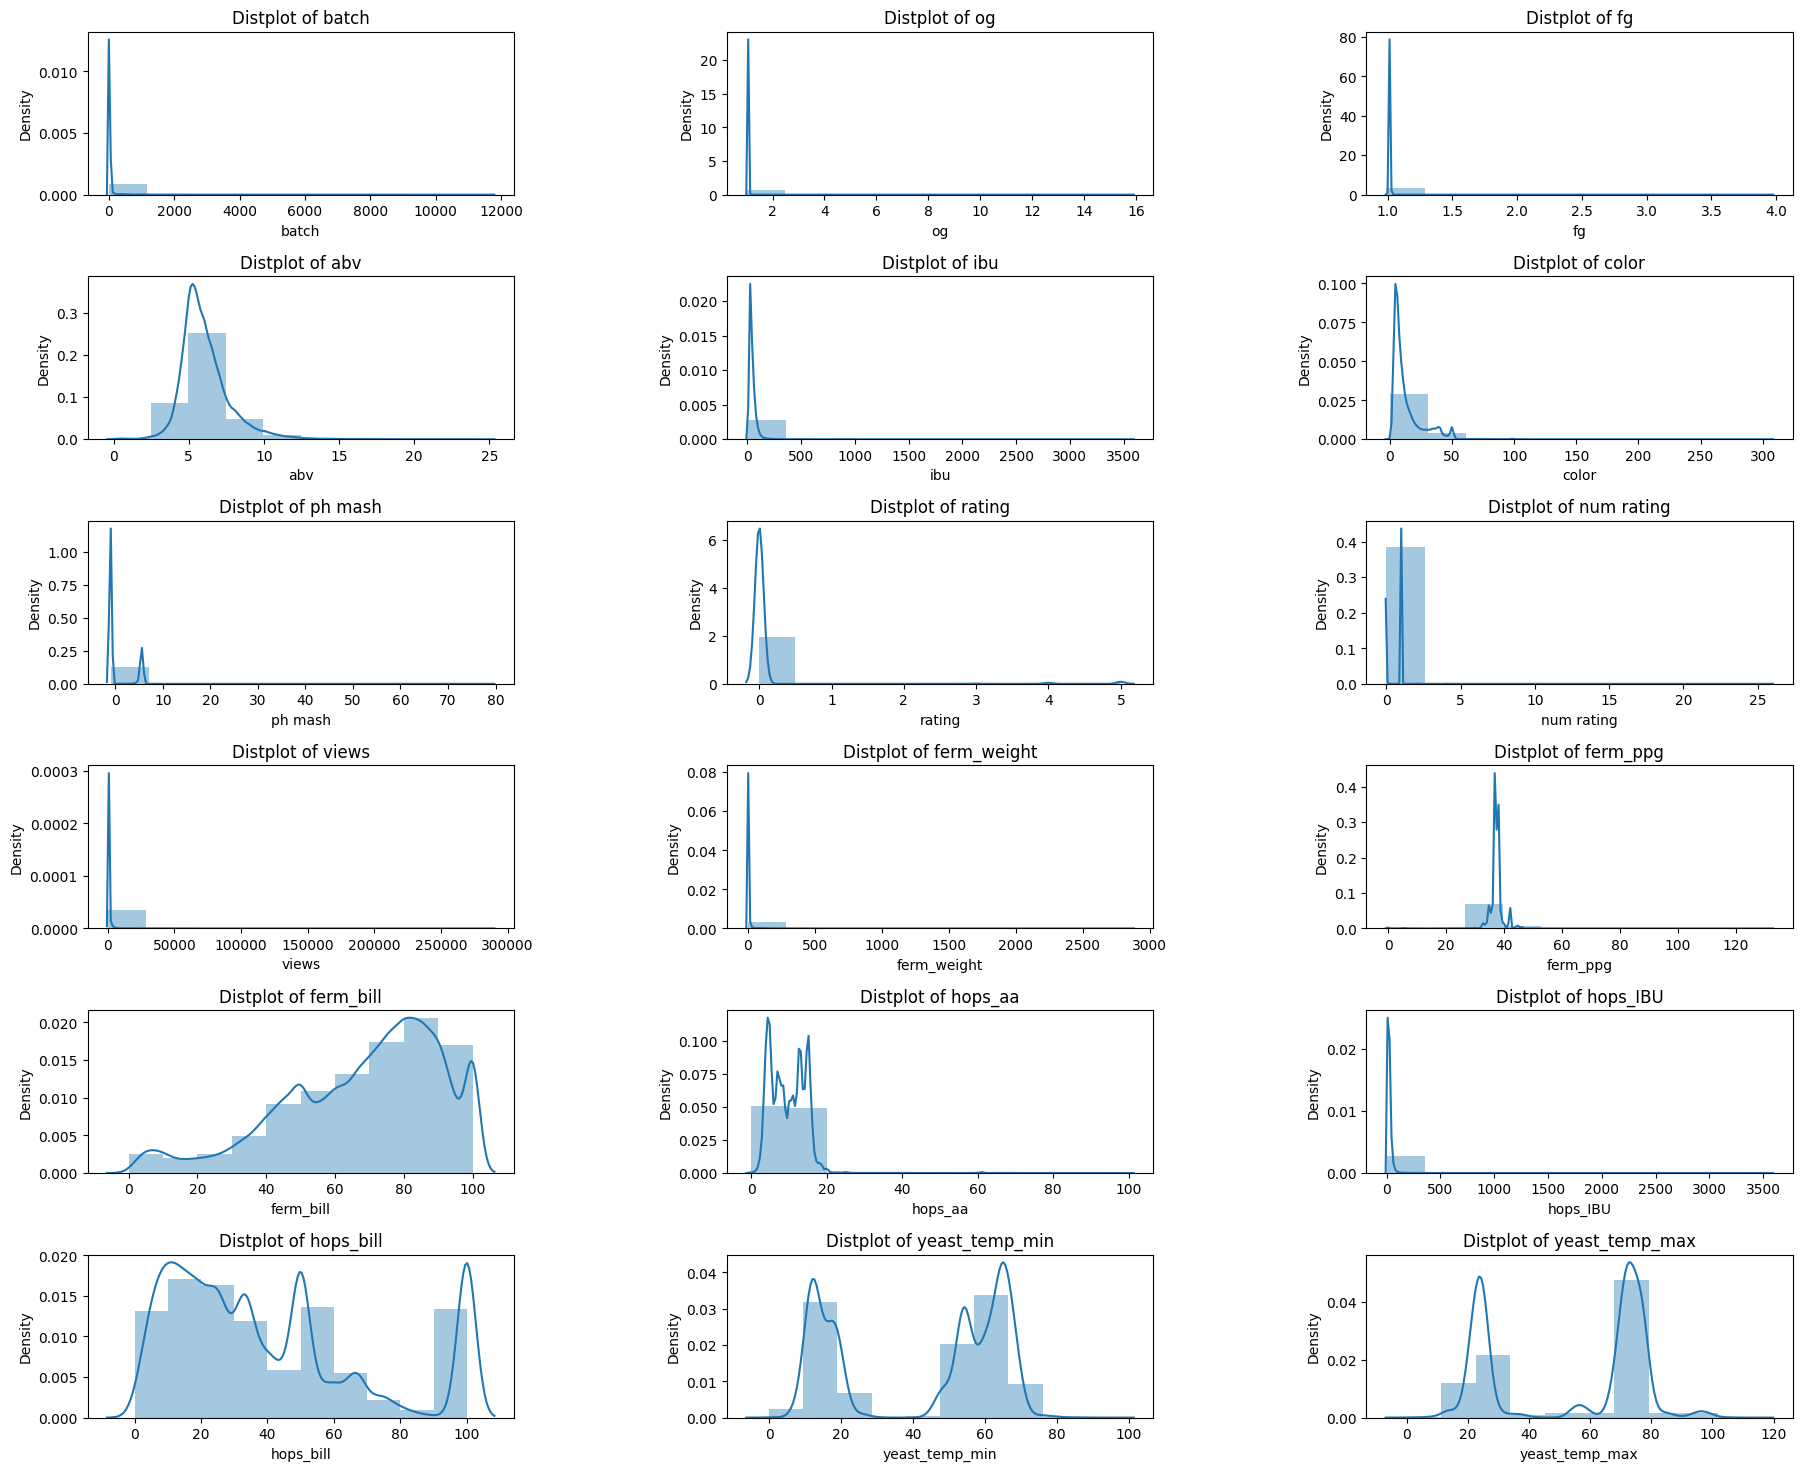

time: 32.4 s (started: 2024-03-06 11:17:14 +00:00)


In [ ]:
#Plotting frequency for all variables

    # Measure memory before plotting
%memit

plt.figure(1, figsize=(22, 18))
n = 0
for x in ['batch',	'og',	'fg',	'abv',	'ibu',	'color',	'ph mash',	'rating',	'num rating',	'views', 'ferm_weight',
          'ferm_ppg',	'ferm_bill',	'hops_aa',	'hops_IBU',	'hops_bill','yeast_temp_min', 'yeast_temp_max']:
    n += 1
    plt.subplot(6, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=10)
    plt.title('Distplot of {}'.format(x))

    # Measure memory after plotting
%memit

plt.show()

# **Data Preprocessing**

The following operations were performed on the dataset:

1. **Categorical Variables and Non-Categorical Variables:** The dataset is divided into two subsets based on categorical and non-categorical variables.

2. **Missing Data Information:** The code calculates and prints the number of missing values for each variable and record.

3. **Missing Data Treatment:** Missing categorical data is imputed using the most frequent value, while missing non-categorical data is also imputed using the most frequent value.

4. **Missing Data Exclusion:** Empty records and variables are excluded from the dataset.

5. **Numeric Coding of Data:** Categorical data is encoded numerically using the Ordinal Encoder from scikit-learn.

6. **Boxplot for Outlier Detection:** Boxplots are generated for each non-categorical variable to visualize the presence of outliers.

7. **Data Transformation & Rescaling:** Non-categorical variables are normalized using Robust Scaling to handle outliers.

8. **Data Bifurcation:** The preprocessed dataset is split into training and testing datasets.

Overall, the code demonstrates a comprehensive preprocessing pipeline for preparing the beer recipe dataset for further analysis or modeling.

### Defining Categorical & Non-Categorical Variables

In [ ]:
# Categorical Variables:
df_cat = df[[ 'name', 'method', 'style', 'hops_name', 'hops_type', 'hops_process',
       'yeast_name',  'yeast_flocculation','yeast_starter']]

# Non-Categorical Variables:
df_noncat = df[['batch',	'og',	'fg',	'abv',	'ibu',	'color',	'ph mash',	'rating',	'num rating',	'views', 'ferm_weight',
       'ferm_ppg',	'ferm_bill', 'hops_weight', 'hops_process_time',	'hops_aa',	'hops_IBU',	'hops_bill', 'yeast_attenuation',	'yeast_temp_min',	'yeast_temp_max']]


time: 94 ms (started: 2024-03-06 11:17:46 +00:00)


### Missing Data Information

In [ ]:
# Missing Data Information

variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information

name                  16806
method                16802
style                 16798
batch                 16798
og                    16798
fg                    16798
abv                   16798
ibu                   16798
color                 16798
ph mash               16798
rating                16798
num rating            16798
views                 16798
ferm_weight           16894
ferm_ppg              16894
ferm_bill             16894
hops_weight           27990
hops_name             27997
hops_type             27990
hops_aa               27990
hops_process          27990
hops_process_time     27990
hops_IBU              27990
hops_bill             27990
yeast_name            16799
yeast_attenuation     16798
yeast_flocculation    16987
yeast_temp_min        17438
yeast_temp_max        16799
yeast_starter         16798
dtype: int64

time: 701 ms (started: 2024-03-06 11:17:46 +00:00)


In [ ]:
# Record-wise Missing Data Information (Top 5) (row-wise)

record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data


161367    26
163972    26
170499    25
156849    25
170119    25
dtype: int64

time: 748 ms (started: 2024-03-06 11:17:47 +00:00)


### Missing Data Treatment

In [ ]:

# Impute Missing Categorical Data [Nominal | Ordinal] using Descriptive Satatistics : Central Tendency (Mode)

# Dataset Used : df_cat

si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Strategy = median [When Odd Number of Categories Exists]
si_cat_fit = si_cat.fit_transform(df_cat)
df_cat_mdi = pd.DataFrame(si_cat_fit, columns=df_cat.columns); df_cat_mdi # Missing Categorical Data Imputed Subset
df_cat_mdi.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171102 entries, 0 to 171101
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   name                171102 non-null  object
 1   method              171102 non-null  object
 2   style               171102 non-null  object
 3   hops_name           171102 non-null  object
 4   hops_type           171102 non-null  object
 5   hops_process        171102 non-null  object
 6   yeast_name          171102 non-null  object
 7   yeast_flocculation  171102 non-null  object
 8   yeast_starter       171102 non-null  object
dtypes: object(9)
memory usage: 11.7+ MB
time: 1.77 s (started: 2024-03-06 11:17:48 +00:00)


In [ ]:
# Impute Missing Non-Categorical Data using Descriptive Statistics : Central Tendency

# Dataset Used : df_noncat

si_noncat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Other Strategy : mean | median | most_frequent | constant
si_noncat_fit = si_noncat.fit_transform(df_noncat)
df_noncat_mdi_si = pd.DataFrame(si_noncat_fit, columns=df_noncat.columns); df_noncat_mdi_si # Missing Non-Categorical Data Imputed Subset using Simple Imputer
df_noncat_mdi_si.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171102 entries, 0 to 171101
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   batch              171102 non-null  object
 1   og                 171102 non-null  object
 2   fg                 171102 non-null  object
 3   abv                171102 non-null  object
 4   ibu                171102 non-null  object
 5   color              171102 non-null  object
 6   ph mash            171102 non-null  object
 7   rating             171102 non-null  object
 8   num rating         171102 non-null  object
 9   views              171102 non-null  object
 10  ferm_weight        171102 non-null  object
 11  ferm_ppg           171102 non-null  object
 12  ferm_bill          171102 non-null  object
 13  hops_weight        171102 non-null  object
 14  hops_process_time  171102 non-null  object
 15  hops_aa            171102 non-null  object
 16  hops_IBU           1

### Missing Data Exclusion

In [ ]:
# Missing Data Exclusion [MCAR | MAR (> 50%)]

# Dataset Used : df_cat_mdi | df_noncat_mdi_si | df_noncat_mdi_ki

# Excluding Empty Records (If Any)
df_cat_mdi.dropna(axis=0, how='all', inplace=True) # Categorical Data Subset
df_noncat_mdi_si.dropna(axis=0, how='all', inplace=True) # Non-Categorical Data Subset

# Excluding Empty Variables (If Any)
df_cat_mdi.dropna(axis=1, how='all', inplace=True) # Categorical Data Subset
df_noncat_mdi_si.dropna(axis=1, how='all', inplace=True) # Non-Categorical Data Subset

df_cat_mdt = df_cat_mdi.copy() # Missing Categorical Treated Dataset
df_noncat_mdt = df_noncat_mdi_si.copy() # Missing Non-Categorical Treated Dataset


time: 3.94 s (started: 2024-03-06 11:17:55 +00:00)


### Numeric Coding of Data

In [ ]:


# Numeric Encoding of Categorical Data

# Dataset Used : df_cat_mdt
df_cat_mdt_code = df_cat_mdt.copy()

# Using Scikit Learn : Ordinal Encoder (Superior)
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df_cat_mdt_code)
column_names = ['name', 'method', 'style', 'hops_name', 'hops_type', 'hops_process',
                'yeast_name',  'yeast_flocculation','yeast_starter']
df_cat_code_oe = pd.DataFrame(oe_fit, columns=column_names);

df_cat_mdt_code_oe = pd.concat([df_cat_mdt_code, df_cat_code_oe], axis=1)
df_cat_mdt_code_oe # (Missing Data Treated) Numeric Coded Categorical Dataset using Scikit Learn Ordinal Encoder


,name,method,style,hops_name,hops_type,hops_process,yeast_name,yeast_flocculation,yeast_starter,name,method,style,hops_name,hops_type,hops_process,yeast_name,yeast_flocculation,yeast_starter
0,Vanilla Cream Ale,All Grain,Cream Ale,Cascade,Pellet,Boil,Wyeast - Kölsch 2565,Low,Yes,100229.0,0.0,47.0,500.0,5.0,19.0,1523.0,3.0,1.0
1,Avg. Perfect Northeast IPA (NEIPA),All Grain,Specialty IPA: New England IPA,Citra,Pellet,Boil,Wyeast - London Ale III 1318,High,No,11340.0,0.0,152.0,633.0,5.0,19.0,1529.0,1.0,0.0
2,Sierra Nevada Pale Ale Clone,All Grain,American Pale Ale,Magnum,Pellet,Boil,Fermentis - Safale - American Ale Yeast US-05,Medium,Yes,87278.0,0.0,10.0,1562.0,5.0,19.0,761.0,12.0,1.0
3,Zombie Dust Clone - ALL GRAIN,All Grain,American IPA,Citra,Pellet,First Wort,Fermentis - Safale - English Ale Yeast S-04,High,Yes,105737.0,0.0,7.0,633.0,5.0,185.0,764.0,1.0,1.0
4,Russian River Pliny the Elder (original),All Grain,Imperial IPA,Columbus,Pellet,Boil,Wyeast - American Ale 1056,Med-Low,No,82350.0,0.0,88.0,686.0,5.0,19.0,1475.0,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171097,Awesome Recipe,All Grain,American IPA,Magnum,Pellet,Boil,White Labs - English Ale Yeast WLP002,Very High,No,11399.0,0.0,7.0,1562.0,5.0,19.0,1344.0,20.0,0.0
171098,Awesome Recipe,All Grain,American IPA,Magnum,Pellet,Boil,- Default - - -,Low,No,11399.0,0.0,7.0,1562.0,5.0,19.0,72.0,3.0,0.0
171099,Awesome Recipe,All Grain,American IPA,Magnum,Pellet,Boil,Imperial Yeast - L17 Harvest,Medium,No,11399.0,0.0,7.0,1562.0,5.0,19.0,900.0,12.0,0.0
171100,Awesome Recipe,All Grain,American IPA,Magnum,Pellet,Boil,Wyeast - California Lager 2112,High,Yes,11399.0,0.0,7.0,1562.0,5.0,19.0,1502.0,1.0,1.0


time: 3.09 s (started: 2024-03-06 11:17:59 +00:00)


### Checking for Outliers

peak memory: 711.17 MiB, increment: 0.00 MiB
peak memory: 764.26 MiB, increment: 0.00 MiB


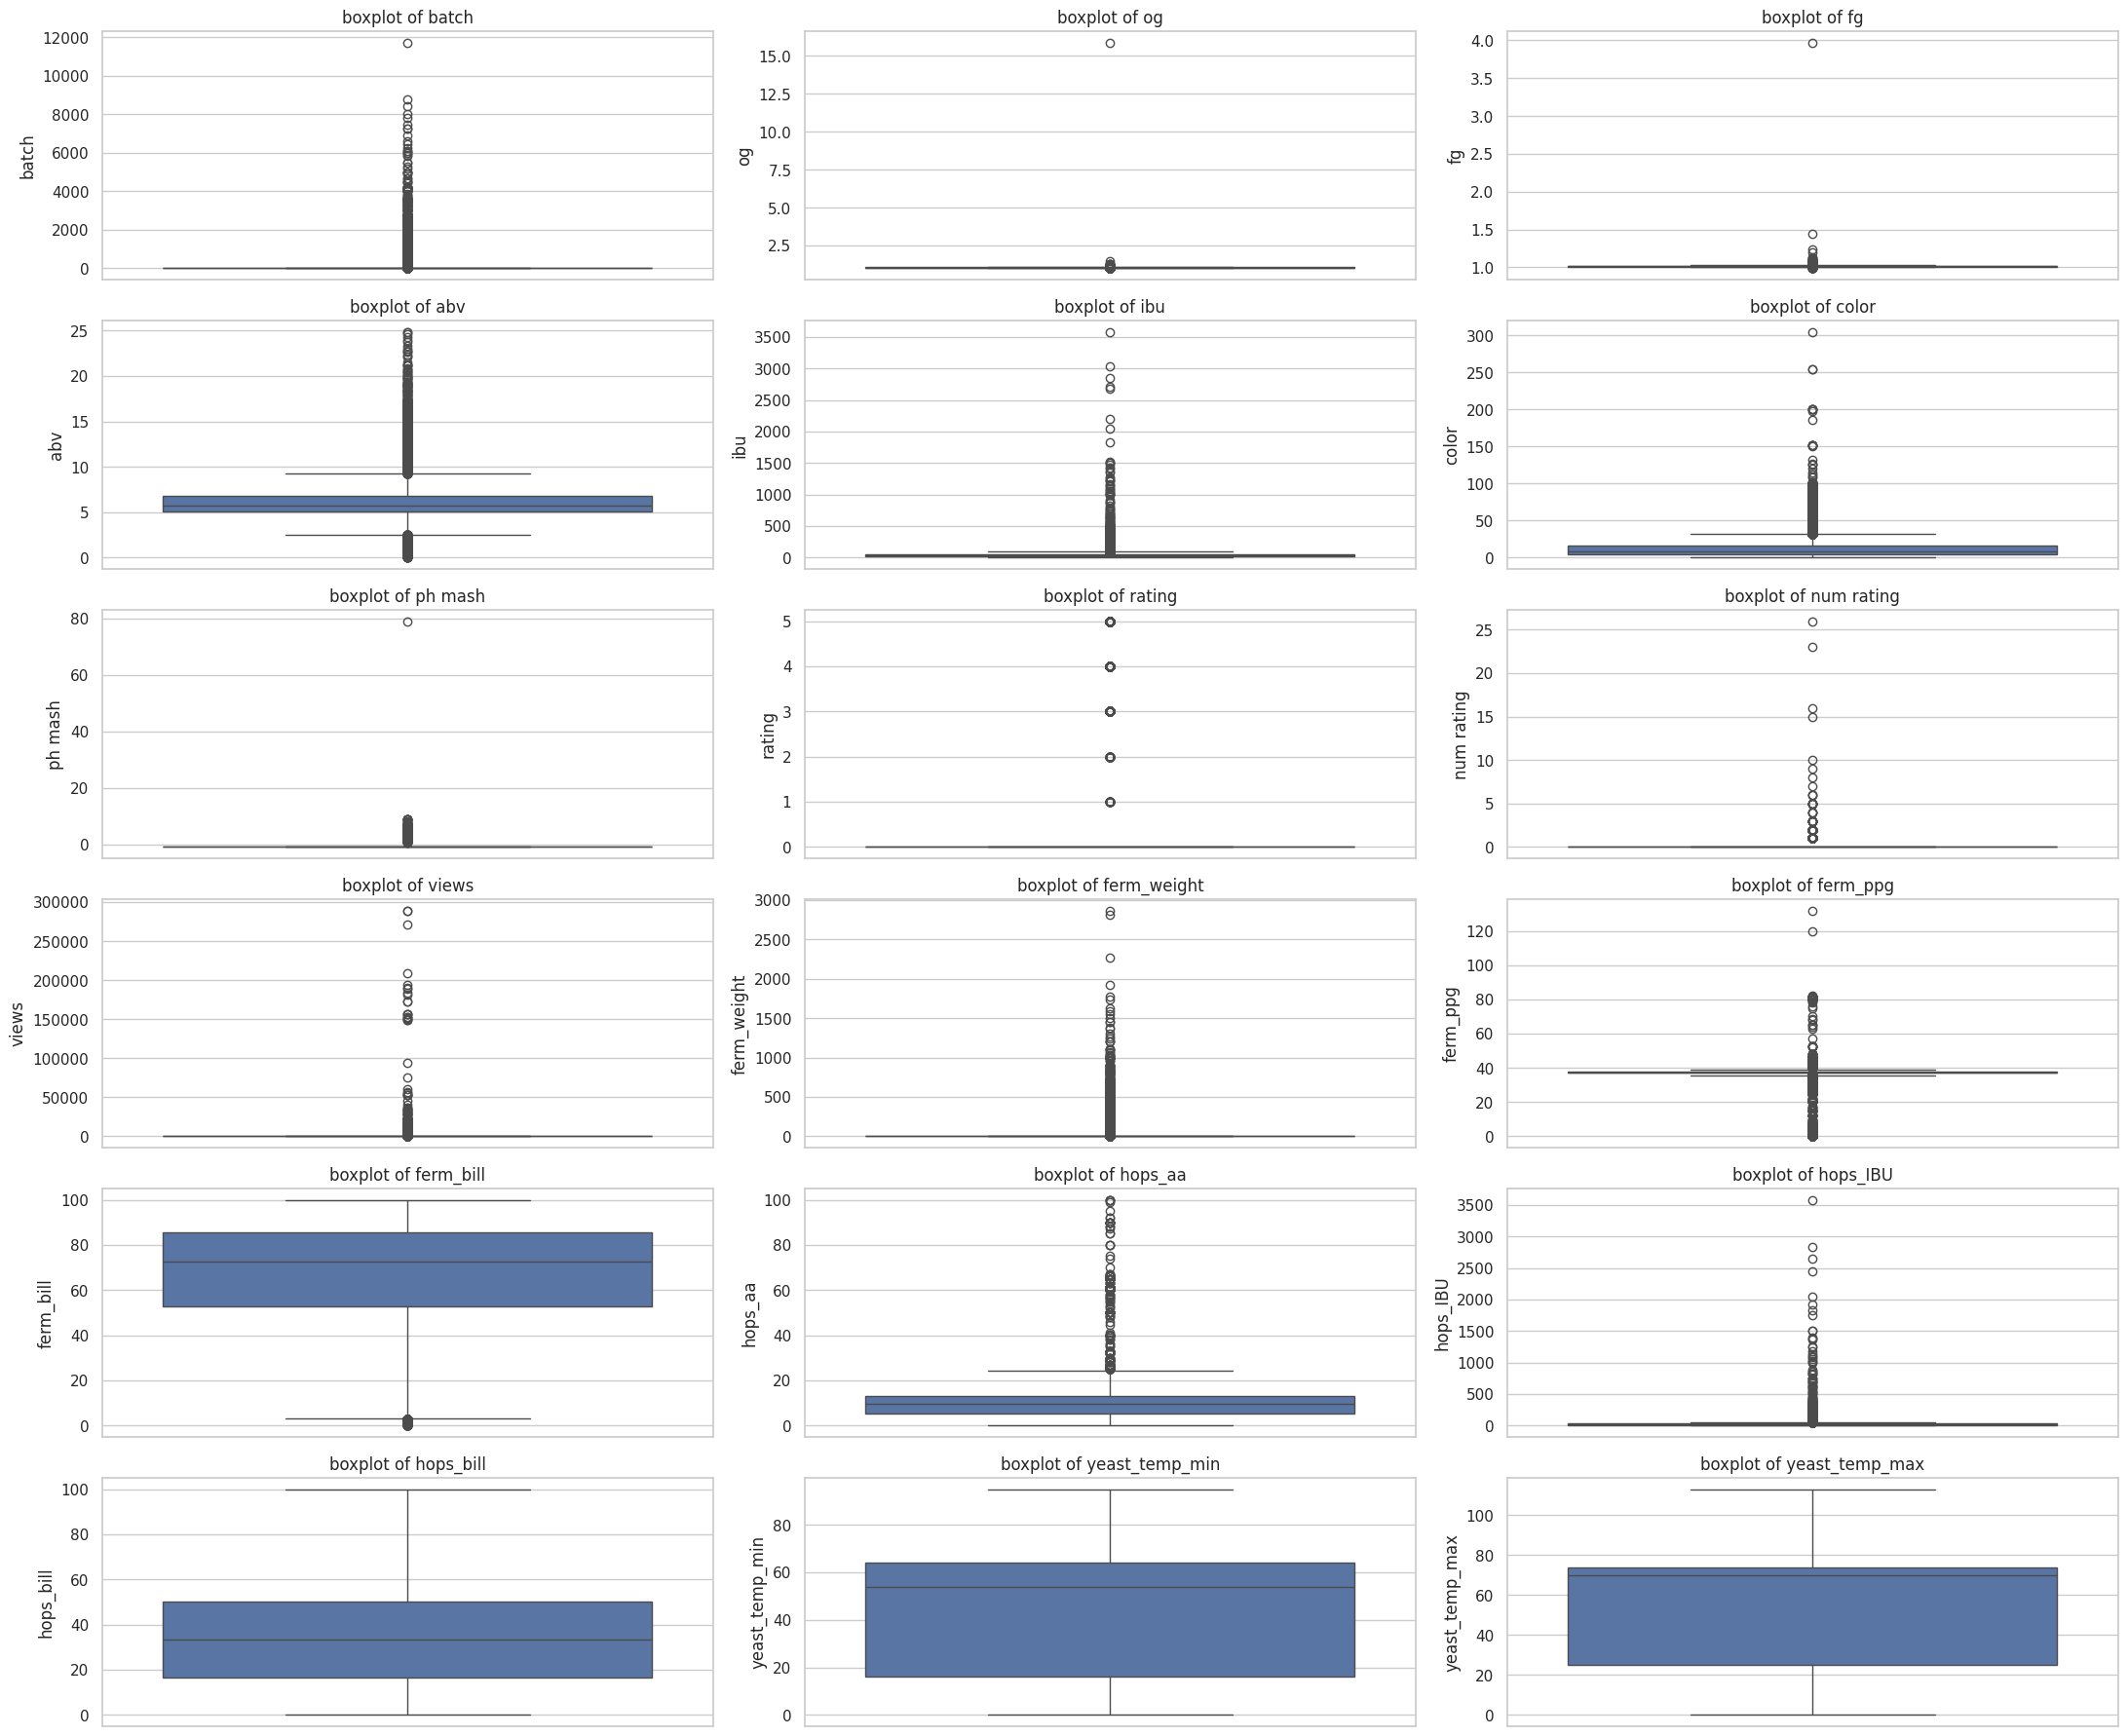

time: 13.7 s (started: 2024-03-06 11:18:02 +00:00)


In [ ]:
#Boxplot for checking the presence of outliers in the dataset

    # Measure memory before plotting
%memit
# Set the style of the seaborn
sns.set(style="whitegrid")

# Create subplots

plt.figure(1, figsize=(22, 18))
n = 0
for x in ['batch',	'og',	'fg',	'abv',	'ibu',	'color',	'ph mash',	'rating',	'num rating',	'views', 'ferm_weight',
          'ferm_ppg',	'ferm_bill',	'hops_aa',	'hops_IBU',	'hops_bill','yeast_temp_min', 'yeast_temp_max']:
    n += 1
    plt.subplot(6, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.boxplot(df[x])
    plt.title('boxplot of {}'.format(x))

# Show the plots
plt.tight_layout()

# Measure memory after plotting
%memit

plt.show()


### Treatment of Outliers

In [ ]:
# Data Transformation & Rescaling

# Dataset Used : df_noncat_mdt

# List of columns to normalize
columns_to_normalize = ['batch',	'og',	'fg',	'abv',	'ibu',	'color',	'ph mash',	'rating',	'num rating',	'views',
                        'ferm_weight','ferm_ppg',	'ferm_bill',	'hops_aa',	'hops_IBU']

# Normalization: Robust Scaling
rs = RobustScaler(quantile_range=(10.0, 90.0))  # quantile_range=(25.0, 75.0) - Default Range

# Initialize an empty DataFrame to store the normalized values
df_noncat_mdt_rn = df_noncat_mdt.copy()

for column_name in columns_to_normalize:
    rs_fit = rs.fit_transform(df_noncat_mdt[[column_name]])
    normalized_column_name = f'{column_name}_robnorm'
    df_noncat_robust_norm = pd.DataFrame(rs_fit, columns=[normalized_column_name])
    df_noncat_mdt_rn = df_noncat_mdt_rn.join(df_noncat_robust_norm)

# (Missing Data Treated) Normalized Non-Categorical Dataset using Scikit Learn Robust Scaler
# df_noncat_mdt_rn = pd.merge(df_noncat_mdt, df_noncat_robust_norm, left_index=True, right_index=True)
df_noncat_mdt_rn


,batch,og,fg,abv,ibu,color,ph mash,rating,num rating,views,...,color_robnorm,ph mash_robnorm,rating_robnorm,num rating_robnorm,views_robnorm,ferm_weight_robnorm,ferm_ppg_robnorm,ferm_bill_robnorm,hops_aa_robnorm,hops_IBU_robnorm
0,21.8,1.055,1.013,5.48,19.44,4.83,-1.0,0.0,16.0,289454.0,...,-0.092444,0.000000,0.0,16.0,394.694407,-0.227285,0.0,-0.507317,-0.457944,-0.141565
1,21.8,1.062,1.013,6.5,59.26,5.2,5.49,0.0,23.0,288318.0,...,-0.084434,0.987823,0.0,23.0,393.144611,0.106093,0.0,0.017886,0.140187,-0.089487
2,24.6,1.055,1.013,5.58,39.79,8.0,5.67,0.0,26.0,271945.0,...,-0.023815,1.015221,0.0,26.0,370.807640,0.151523,0.0,0.273171,0.364486,0.132274
3,22.7,1.061,1.016,5.94,62.42,8.5,5.81,0.0,10.0,208996.0,...,-0.012990,1.036530,0.0,10.0,284.929059,0.166756,0.0,0.094309,-0.009346,-0.040098
4,22.7,1.072,1.018,7.09,232.89,6.33,-1.0,0.0,6.0,193832.0,...,-0.059970,0.000000,0.0,6.0,264.241473,0.257616,0.0,0.183740,0.364486,3.773350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171097,20.8,1.05,1.012,5.2,0.0,50.0,-1.0,0.0,0.0,44.0,...,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782
171098,20.8,1.05,1.012,5.2,0.0,50.0,-1.0,0.0,0.0,44.0,...,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782
171099,20.8,1.05,1.012,5.2,0.0,50.0,-1.0,0.0,0.0,44.0,...,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782
171100,20.8,1.05,1.012,5.2,0.0,50.0,-1.0,0.0,0.0,44.0,...,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782


time: 1.42 s (started: 2024-03-06 11:18:16 +00:00)


In [ ]:
# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_mdt_code_oe.copy(); df_cat_ppd # Preferred Data Subset

# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_mdt_rn.copy(); df_noncat_ppd # Preferred Data Subset

# Pre-Processed Dataset
df_ppd = df_cat_ppd.join(df_noncat_ppd); df_ppd # Pre-Processed Dataset

,name,method,style,hops_name,hops_type,hops_process,yeast_name,yeast_flocculation,yeast_starter,name,...,color_robnorm,ph mash_robnorm,rating_robnorm,num rating_robnorm,views_robnorm,ferm_weight_robnorm,ferm_ppg_robnorm,ferm_bill_robnorm,hops_aa_robnorm,hops_IBU_robnorm
0,Vanilla Cream Ale,All Grain,Cream Ale,Cascade,Pellet,Boil,Wyeast - Kölsch 2565,Low,Yes,100229.0,...,-0.092444,0.000000,0.0,16.0,394.694407,-0.227285,0.0,-0.507317,-0.457944,-0.141565
1,Avg. Perfect Northeast IPA (NEIPA),All Grain,Specialty IPA: New England IPA,Citra,Pellet,Boil,Wyeast - London Ale III 1318,High,No,11340.0,...,-0.084434,0.987823,0.0,23.0,393.144611,0.106093,0.0,0.017886,0.140187,-0.089487
2,Sierra Nevada Pale Ale Clone,All Grain,American Pale Ale,Magnum,Pellet,Boil,Fermentis - Safale - American Ale Yeast US-05,Medium,Yes,87278.0,...,-0.023815,1.015221,0.0,26.0,370.807640,0.151523,0.0,0.273171,0.364486,0.132274
3,Zombie Dust Clone - ALL GRAIN,All Grain,American IPA,Citra,Pellet,First Wort,Fermentis - Safale - English Ale Yeast S-04,High,Yes,105737.0,...,-0.012990,1.036530,0.0,10.0,284.929059,0.166756,0.0,0.094309,-0.009346,-0.040098
4,Russian River Pliny the Elder (original),All Grain,Imperial IPA,Columbus,Pellet,Boil,Wyeast - American Ale 1056,Med-Low,No,82350.0,...,-0.059970,0.000000,0.0,6.0,264.241473,0.257616,0.0,0.183740,0.364486,3.773350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171097,Awesome Recipe,All Grain,American IPA,Magnum,Pellet,Boil,White Labs - English Ale Yeast WLP002,Very High,No,11399.0,...,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782
171098,Awesome Recipe,All Grain,American IPA,Magnum,Pellet,Boil,- Default - - -,Low,No,11399.0,...,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782
171099,Awesome Recipe,All Grain,American IPA,Magnum,Pellet,Boil,Imperial Yeast - L17 Harvest,Medium,No,11399.0,...,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782
171100,Awesome Recipe,All Grain,American IPA,Magnum,Pellet,Boil,Wyeast - California Lager 2112,High,Yes,11399.0,...,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782


time: 333 ms (started: 2024-03-06 11:18:17 +00:00)


In [ ]:
df1 = df_ppd.copy()

df1 = df1.drop(['name',	'method',	'style',	'hops_name',	'hops_type',	'hops_weight','hops_process',	'yeast_name',	'yeast_flocculation',	'yeast_starter',
                'batch',	'og',	'fg',	'abv',	'ibu',	'color',	'ph mash',	'rating',	'num rating',	'views',
                'ferm_weight','ferm_ppg',	'ferm_bill',	'hops_aa',	'hops_IBU'], axis=1)

df1

,hops_process_time,hops_bill,yeast_attenuation,yeast_temp_min,yeast_temp_max,batch_robnorm,og_robnorm,fg_robnorm,abv_robnorm,ibu_robnorm,color_robnorm,ph mash_robnorm,rating_robnorm,num rating_robnorm,views_robnorm,ferm_weight_robnorm,ferm_ppg_robnorm,ferm_bill_robnorm,hops_aa_robnorm,hops_IBU_robnorm
0,60 min,33.3,76%,56.0,70.0,0.034483,0.00000,0.1,-0.032544,-0.172153,-0.092444,0.000000,0.0,16.0,394.694407,-0.227285,0.0,-0.507317,-0.457944,-0.141565
1,10 min,7.3,78%,64.0,74.0,0.034483,0.21875,0.1,0.269231,0.365084,-0.084434,0.987823,0.0,23.0,393.144611,0.106093,0.0,0.017886,0.140187,-0.089487
2,60 min,8.3,76%,54.0,77.0,0.131034,0.00000,0.1,-0.002959,0.102402,-0.023815,1.015221,0.0,26.0,370.807640,0.151523,0.0,0.273171,0.364486,0.132274
3,0 min,8.6,75%,54.0,77.0,0.065517,0.18750,0.4,0.103550,0.407717,-0.012990,1.036530,0.0,10.0,284.929059,0.166756,0.0,0.094309,-0.009346,-0.040098
4,90 min,28.0,75%,60.0,72.0,0.065517,0.53125,0.6,0.443787,2.707636,-0.059970,0.000000,0.0,6.0,264.241473,0.257616,0.0,0.183740,0.364486,3.773350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171097,60 min,100.0,66.5%,65.0,68.0,0.000000,-0.15625,0.0,-0.115385,-0.434431,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782
171098,60 min,100.0,65%,65.0,78.0,0.000000,-0.15625,0.0,-0.115385,-0.434431,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782
171099,60 min,100.0,80%,50.0,60.0,0.000000,-0.15625,0.0,-0.115385,-0.434431,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782
171100,60 min,100.0,70%,58.0,68.0,0.000000,-0.15625,0.0,-0.115385,-0.434431,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782


time: 389 ms (started: 2024-03-06 11:18:18 +00:00)


Cleaning and transforming the specified columns in `df1` by removing S.I. units and symbols from the records for further analysis

1. **hops_process_time:** It converts the values in the column to strings, then extracts the first group of digits (if any) from each string and converts it to an integer. If there are no digits in the string, it leaves the value unchanged.

2. **hops_bill:** Similar to `hops_process_time`, it converts the values to strings, extracts the first group of digits (if any), and converts it to an integer.

3. **yeast_attenuation:** It removes the '%' character from the values (if present) using a regex pattern, and then converts the column to numeric type. The `errors='coerce'` argument means that if any value cannot be converted to a numeric type, it will be set to `NaN`.

4. **yeast_temp_min and yeast_temp_max:** These columns are processed similarly to `hops_process_time` and `hops_bill`, converting the values to strings, extracting the first group of digits (if any), and converting them to integers.


In [ ]:
import re

# Assuming df1 is your DataFrame
df1['hops_process_time'] = df1['hops_process_time'].astype(str).apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else x)
df1['hops_bill'] = df1['hops_bill'].astype(str).apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else x)
df1['yeast_attenuation'] = df1['yeast_attenuation'].apply(lambda x: re.sub(r'%', '', x) if isinstance(x, str) else x)
# Convert the column to numeric type
df1['yeast_attenuation'] = pd.to_numeric(df1['yeast_attenuation'], errors='coerce')
df1['yeast_temp_min'] = df1['yeast_temp_min'].astype(str).apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else x)
df1['yeast_temp_max'] = df1['yeast_temp_max'].astype(str).apply(lambda x: int(re.search(r'\d+', x).group()) if re.search(r'\d+', x) else x)

df1


,hops_process_time,hops_bill,yeast_attenuation,yeast_temp_min,yeast_temp_max,batch_robnorm,og_robnorm,fg_robnorm,abv_robnorm,ibu_robnorm,color_robnorm,ph mash_robnorm,rating_robnorm,num rating_robnorm,views_robnorm,ferm_weight_robnorm,ferm_ppg_robnorm,ferm_bill_robnorm,hops_aa_robnorm,hops_IBU_robnorm
0,60,33,76.0,56,70,0.034483,0.00000,0.1,-0.032544,-0.172153,-0.092444,0.000000,0.0,16.0,394.694407,-0.227285,0.0,-0.507317,-0.457944,-0.141565
1,10,7,78.0,64,74,0.034483,0.21875,0.1,0.269231,0.365084,-0.084434,0.987823,0.0,23.0,393.144611,0.106093,0.0,0.017886,0.140187,-0.089487
2,60,8,76.0,54,77,0.131034,0.00000,0.1,-0.002959,0.102402,-0.023815,1.015221,0.0,26.0,370.807640,0.151523,0.0,0.273171,0.364486,0.132274
3,0,8,75.0,54,77,0.065517,0.18750,0.4,0.103550,0.407717,-0.012990,1.036530,0.0,10.0,284.929059,0.166756,0.0,0.094309,-0.009346,-0.040098
4,90,28,75.0,60,72,0.065517,0.53125,0.6,0.443787,2.707636,-0.059970,0.000000,0.0,6.0,264.241473,0.257616,0.0,0.183740,0.364486,3.773350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171097,60,100,66.5,65,68,0.000000,-0.15625,0.0,-0.115385,-0.434431,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782
171098,60,100,65.0,65,78,0.000000,-0.15625,0.0,-0.115385,-0.434431,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782
171099,60,100,80.0,50,60,0.000000,-0.15625,0.0,-0.115385,-0.434431,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782
171100,60,100,70.0,58,68,0.000000,-0.15625,0.0,-0.115385,-0.434431,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782


time: 2.92 s (started: 2024-03-06 11:18:18 +00:00)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171102 entries, 0 to 171101
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   hops_process_time    171102 non-null  int64  
 1   hops_bill            171102 non-null  int64  
 2   yeast_attenuation    171090 non-null  float64
 3   yeast_temp_min       171102 non-null  int64  
 4   yeast_temp_max       171102 non-null  int64  
 5   batch_robnorm        171102 non-null  float64
 6   og_robnorm           171102 non-null  float64
 7   fg_robnorm           171102 non-null  float64
 8   abv_robnorm          171102 non-null  float64
 9   ibu_robnorm          171102 non-null  float64
 10  color_robnorm        171102 non-null  float64
 11  ph mash_robnorm      171102 non-null  float64
 12  rating_robnorm       171102 non-null  float64
 13  num rating_robnorm   171102 non-null  float64
 14  views_robnorm        171102 non-null  float64
 15  ferm_weight_robno

### Data Bifurcation into Training & Testing Datasets

In [ ]:

# Dataset Used : df1
    # Measure memory before plotting
%memit
train_df, test_df = train_test_split(df1, test_size=0.25, random_state=1234)
    # Measure memory after plotting
%memit

train_df # Training Dataset

test_df # Testing Dataset

peak memory: 952.18 MiB, increment: 0.00 MiB
peak memory: 983.52 MiB, increment: 0.00 MiB


,hops_process_time,hops_bill,yeast_attenuation,yeast_temp_min,yeast_temp_max,batch_robnorm,og_robnorm,fg_robnorm,abv_robnorm,ibu_robnorm,color_robnorm,ph mash_robnorm,rating_robnorm,num rating_robnorm,views_robnorm,ferm_weight_robnorm,ferm_ppg_robnorm,ferm_bill_robnorm,hops_aa_robnorm,hops_IBU_robnorm
94585,30,33,82.0,12,25,-0.065517,-0.15625,-0.4,0.005917,-0.170669,-0.105218,0.000000,0.0,0.0,-0.040928,-0.272715,-1.250000,-0.530081,-0.663551,-0.304401
4204,60,50,73.0,62,72,0.000000,1.09375,1.4,0.855030,-0.014436,0.222126,0.000000,0.0,0.0,2.345157,0.181855,0.000000,0.112195,0.177570,0.083619
34,60,33,73.0,64,74,0.065517,0.50000,0.5,0.464497,-0.020103,0.040701,1.001522,0.0,3.0,46.862210,0.203634,0.000000,0.004878,-0.588785,-0.057457
76576,60,25,81.0,12,25,0.110345,-0.15625,-0.9,0.204142,-0.139908,-0.077289,0.000000,0.0,0.0,0.062756,1.212186,0.000000,-0.252033,0.355140,0.323227
142278,30,100,75.0,12,25,0.006897,0.50000,0.1,0.633136,0.043578,0.035073,0.000000,0.0,0.0,-0.155525,-0.018707,0.000000,-0.076423,-0.009346,0.118826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14702,0,4,72.0,15,24,0.717241,-0.12500,0.1,-0.171598,0.010523,0.135744,0.000000,0.0,0.0,0.942701,-0.272715,0.000000,-0.813008,0.294393,-0.278729
2953,10,33,81.0,12,25,0.000000,0.46875,0.9,0.254438,0.144765,0.668976,0.000000,0.0,0.0,3.019100,0.227285,0.000000,-0.396748,-0.644860,-0.318826
68311,60,31,73.0,62,70,0.000000,-0.09375,-0.3,0.008876,0.016190,-0.128599,0.000000,0.0,0.0,0.147340,-0.037680,0.416667,0.203252,0.691589,0.281174
161686,60,100,82.0,48,72,0.000000,-0.15625,0.0,-0.115385,-0.434431,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.000000,0.391870,0.364486,-0.420782


time: 818 ms (started: 2024-03-06 11:18:21 +00:00)


In [ ]:
print(df1.isnull().sum())

hops_process_time       0
hops_bill               0
yeast_attenuation      12
yeast_temp_min          0
yeast_temp_max          0
batch_robnorm           0
og_robnorm              0
fg_robnorm              0
abv_robnorm             0
ibu_robnorm             0
color_robnorm           0
ph mash_robnorm         0
rating_robnorm          0
num rating_robnorm      0
views_robnorm           0
ferm_weight_robnorm     0
ferm_ppg_robnorm        0
ferm_bill_robnorm       0
hops_aa_robnorm         0
hops_IBU_robnorm        0
dtype: int64
time: 14.7 ms (started: 2024-03-06 11:18:22 +00:00)


Using the SimpleImputer class from scikit-learn to replace missing (NaN) values in `df1` with the most frequent value (mode) in each column.

In [ ]:

# Replace NaN values with the mean of each column
imputer = SimpleImputer(strategy='most_frequent')
df1 = pd.DataFrame(imputer.fit_transform(df1), columns=df1.columns)

df1


,hops_process_time,hops_bill,yeast_attenuation,yeast_temp_min,yeast_temp_max,batch_robnorm,og_robnorm,fg_robnorm,abv_robnorm,ibu_robnorm,color_robnorm,ph mash_robnorm,rating_robnorm,num rating_robnorm,views_robnorm,ferm_weight_robnorm,ferm_ppg_robnorm,ferm_bill_robnorm,hops_aa_robnorm,hops_IBU_robnorm
0,60.0,33.0,76.0,56.0,70.0,0.034483,0.00000,0.1,-0.032544,-0.172153,-0.092444,0.000000,0.0,16.0,394.694407,-0.227285,0.0,-0.507317,-0.457944,-0.141565
1,10.0,7.0,78.0,64.0,74.0,0.034483,0.21875,0.1,0.269231,0.365084,-0.084434,0.987823,0.0,23.0,393.144611,0.106093,0.0,0.017886,0.140187,-0.089487
2,60.0,8.0,76.0,54.0,77.0,0.131034,0.00000,0.1,-0.002959,0.102402,-0.023815,1.015221,0.0,26.0,370.807640,0.151523,0.0,0.273171,0.364486,0.132274
3,0.0,8.0,75.0,54.0,77.0,0.065517,0.18750,0.4,0.103550,0.407717,-0.012990,1.036530,0.0,10.0,284.929059,0.166756,0.0,0.094309,-0.009346,-0.040098
4,90.0,28.0,75.0,60.0,72.0,0.065517,0.53125,0.6,0.443787,2.707636,-0.059970,0.000000,0.0,6.0,264.241473,0.257616,0.0,0.183740,0.364486,3.773350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171097,60.0,100.0,66.5,65.0,68.0,0.000000,-0.15625,0.0,-0.115385,-0.434431,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782
171098,60.0,100.0,65.0,65.0,78.0,0.000000,-0.15625,0.0,-0.115385,-0.434431,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782
171099,60.0,100.0,80.0,50.0,60.0,0.000000,-0.15625,0.0,-0.115385,-0.434431,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782
171100,60.0,100.0,70.0,58.0,68.0,0.000000,-0.15625,0.0,-0.115385,-0.434431,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782


time: 300 ms (started: 2024-03-06 11:18:22 +00:00)


# **Clustering**



## Assessment Criteria

1. **Silhouette Score (SS)**:
   - The Silhouette Score is a measure of how similar an object is to its own cluster compared to other clusters.
   - It quantifies the separation between clusters. A high Silhouette Score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
   - The Silhouette Score ranges from -1 to 1, where a high value indicates that the object is well-clustered, a value near 0 indicates overlapping clusters, and negative values suggest that the object may have been assigned to the wrong cluster.
   - In the context of K-means clustering, the average Silhouette Score across all data points can be used to evaluate the quality of clustering. Higher average Silhouette Scores indicate better-defined clusters.

2. **Davies-Bouldin Index (DBI)**:
   - The Davies-Bouldin Index is a measure of cluster compactness and separation.
   - It evaluates the average similarity between each cluster and its most similar cluster, weighted by the cluster sizes.
   - A lower DBI indicates better clustering, with clusters that are well-separated from each other and internally compact.
   - The DBI considers both intra-cluster and inter-cluster distances, aiming to minimize intra-cluster distance while maximizing inter-cluster distance.
   - Like the Silhouette Score, the Davies-Bouldin Index is used to assess the quality of clustering algorithms, with lower values indicating better-defined clusters.

**NOTE:**

* DBI: Lower values are better. A DBI close to 0 indicates well-separated clusters.
* Silhouette Score: Higher values are better. A score close to 1 indicates dense, well-separated clusters, while negative values suggest overlapping clusters.

These metrics provide insights into the quality and interpretability of the clustering results, helping to guide the selection of the optimal number of clusters for a given dataset.


## K-Means Clustering

1. **Simple and Fast**: K-means is computationally efficient and relatively easy to understand and implement. It works well with large datasets, making it suitable for analysis even when dealing with a significant amount of data.

2. **Scalability**: K-means clustering is scalable to a large number of samples and has been used in many large-scale data processing scenarios.

3. **Interpretability**: K-means produces clusters that are easy to interpret. Each cluster is represented by its centroid, which is the mean of all the data points assigned to that cluster. This centroid can provide insight into the characteristics of the cluster.

4. **Versatility**: K-means can be applied to various types of data and can handle both numerical and categorical variables (after appropriate preprocessing). This versatility makes it applicable to a wide range of datasets.

5. **Well-suited for Convex Clusters**: K-means performs well when clusters are spherical or close to spherical in shape. It tries to minimize the within-cluster variance, which makes it suitable for convex clusters.

6. **Initial Centroid Selection**: While the performance of K-means can be sensitive to the initial choice of centroids, there are strategies to mitigate this issue, such as multiple initializations with different seeds and more advanced methods like k-means++.

However, it's essential to consider potential limitations as well:

1. **Sensitive to Initial Centroid Selection**: The results of K-means clustering can be sensitive to the initial placement of centroids. Different initializations may lead to different results.

2. **Assumes Spherical Clusters**: K-means assumes that clusters are spherical and isotropic, which may not always hold true for complex datasets with irregularly shaped clusters.

3. **Number of Clusters (K) Selection**: Determining the appropriate number of clusters (K) can be challenging and may require domain knowledge or additional validation techniques, such as the elbow method or silhouette analysis.

4. **Sensitive to Outliers**: K-means is sensitive to outliers, as it tries to minimize the within-cluster variance. Outliers can significantly impact the positions of cluster centroids.

5. **Equal Variance Among Clusters**: K-means assumes that clusters have equal variance, which may not always be the case in practice.

Overall, while K-means clustering has its limitations, it can still be a valuable tool for exploratory analysis and pattern discovery in your dataset, especially if the assumptions of the algorithm are met and appropriate preprocessing steps are taken.



### Determining Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia

The elbow curve is used to determine the optimal number of clusters (k) for the K-means clustering algorithm. It plots the Within Cluster Sum of Squared Distances (WCSS) on the y-axis and the number of clusters (k) on the x-axis.

The elbow curve appears to have a distinct bend and decreases steadily around k=4. This suggests that optimal number of clusters for this dataset will be in the range of 4 to 6.


In [ ]:
from memory_profiler import memory_usage
import time

#Track start time
start_time = time.time()

# Track initial memory usage
initial_memory = memory_usage()[0]

time: 102 ms (started: 2024-03-06 12:37:46 +00:00)


peak memory: 1297.84 MiB, increment: 0.00 MiB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

peak memory: 1334.44 MiB, increment: 0.00 MiB


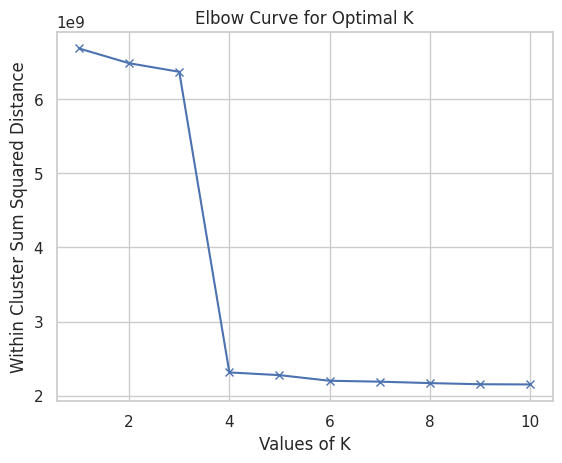

time: 22.5 s (started: 2024-03-06 12:37:51 +00:00)


In [ ]:


'''
KMeans-Inertia : Sum of Squared Distances of Samples to their closest Cluster Center (Centroid), Weighted by the Sample Weights (if provided)
'''

# Measure memory before plotting
%memit
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111)
    kmeans.fit(df1)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')

# Measure memory after plotting
%memit

plt.show()



### Model Performance


**Methodology**

The K-means clustering algorithm was employed with varying numbers of clusters (2, 4, 5, and 6). The methodology involved the initialization of centroids and iterative updates to minimize within-cluster variance. Evaluation metrics, specifically Silhouette Score and Davies-Bouldin Index, were calculated to gauge the effectiveness of the clustering.


**K-means with 2 Clusters**

**Silhouette Score (SS):** 0.4061

**Davies-Bouldin Index (DBI):** 1.1905

**Interpretation:**
The clusters exhibit reasonable separation, as indicated by the Silhouette Score. However, the Davies-Bouldin Index suggests some overlap or suboptimal clustering.




In [ ]:
# Create K-Means Clusters [K=2]

# Measure memory before plotting
%memit
km_2cluster = kmclus(n_clusters=2, init='random', random_state=222)
df1['Cluster'] = km_2cluster.fit_predict(df1)
km_2cluster_model = df1['Cluster'].values
# Measure memory after plotting
%memit
km_2cluster_model

peak memory: 1334.48 MiB, increment: 0.00 MiB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



peak memory: 1334.51 MiB, increment: 0.00 MiB


array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

time: 3.16 s (started: 2024-03-06 12:38:20 +00:00)


In [ ]:
# Measure memory before plotting
%memit

sscore_km_2cluster = sscore(df1, km_2cluster_model);
print(f"Silhouette Score for 2 clusters: {sscore_km_2cluster}")

dbscore_km_2cluster = dbscore(df1, km_2cluster_model);
print(f"Davies-Bouldin Index for 2 clusters: {dbscore_km_2cluster}")

# Measure memory after plotting
%memit

peak memory: 1334.51 MiB, increment: 0.00 MiB
Silhouette Score for 2 clusters: 0.4058520909215187
Davies-Bouldin Index for 2 clusters: 1.1913449249093353
peak memory: 1334.60 MiB, increment: 0.00 MiB
time: 7min 18s (started: 2024-03-06 12:38:27 +00:00)


**K-means with 4 Clusters**

**Silhouette Score (SS):** 0.4591

**Davies-Bouldin Index (DBI):** 0.7575

**Interpretation:**
The clusters demonstrate improved separation, with a higher Silhouette Score and a lower Davies-Bouldin Index compared to the 2-cluster configuration.

In [ ]:
# Create K-Means Clusters [K=4]

# Measure memory before plotting
%memit
km_4cluster = kmclus(n_clusters=4, init='random', random_state=444)
df1['Cluster'] = km_4cluster.fit_predict(df1)
km_4cluster_model = df1['Cluster'].values
# Measure memory after plotting
%memit
km_4cluster_model

peak memory: 1334.60 MiB, increment: 0.00 MiB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



peak memory: 1334.61 MiB, increment: 0.00 MiB


array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

time: 2.11 s (started: 2024-03-06 12:48:21 +00:00)


In [ ]:
# Measure memory before plotting
%memit

sscore_km_4cluster = sscore(df1, km_4cluster_model);
print(f"Silhouette Score for 4 clusters: {sscore_km_4cluster}")

dbscore_km_4cluster = dbscore(df1, km_4cluster_model);
print(f"Davies-Bouldin Index for 4 clusters: {dbscore_km_4cluster}")

# Measure memory after plotting
%memit

peak memory: 1334.62 MiB, increment: 0.00 MiB
Silhouette Score for 4 clusters: 0.45911126087304266
Davies-Bouldin Index for 4 clusters: 0.7575195964851587
peak memory: 1334.69 MiB, increment: 0.00 MiB
time: 7min 19s (started: 2024-03-06 12:48:29 +00:00)


**K-means with 5 Clusters**

**Silhouette Score (SS):** 0.5081

**Davies-Bouldin Index (DBI):** 0.6776

**Interpretation:**
Further increasing the number of clusters enhances the Silhouette Score, indicating better-defined clusters. The Davies-Bouldin Index remains relatively low, suggesting improved clustering quality.

In [ ]:
# Create K-Means Clusters [K=5]

# Measure memory before plotting
%memit
km_5cluster = kmclus(n_clusters=5, init='random', random_state=555)
df1['Cluster'] = km_5cluster.fit_predict(df1)
km_5cluster_model = df1['Cluster'].values
# Measure memory after plotting
%memit
km_5cluster_model

peak memory: 1334.69 MiB, increment: 0.00 MiB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



peak memory: 1334.70 MiB, increment: 0.00 MiB


array([4, 4, 4, ..., 0, 0, 1], dtype=int32)

time: 4.56 s (started: 2024-03-06 12:58:38 +00:00)


In [ ]:
# Measure memory before plotting
%memit

sscore_km_5cluster = sscore(df1, km_5cluster_model);
print(f"Silhouette Score for 5 clusters: {sscore_km_5cluster}")

dbscore_km_5cluster = dbscore(df1, km_5cluster_model);
print(f"Davies-Bouldin Index for 5 clusters: {dbscore_km_5cluster}")

# Measure memory after plotting
%memit

peak memory: 1334.70 MiB, increment: 0.00 MiB
Silhouette Score for 5 clusters: 0.5086115367895725
Davies-Bouldin Index for 5 clusters: 0.6773079356920634
peak memory: 1334.70 MiB, increment: 0.00 MiB
time: 7min 19s (started: 2024-03-06 12:59:00 +00:00)


**K-means with 6 Clusters**

**Silhouette Score (SS):** 0.5034

**Davies-Bouldin Index (DBI):** 0.6936

**Interpretation:**
The addition of clusters yields a stable Silhouette Score, indicating reasonable separation. The Davies-Bouldin Index remains low, supporting the quality of the clustering.

In [ ]:
# Create K-Means Clusters [K=6]

# Measure memory before plotting
%memit
km_6cluster = kmclus(n_clusters=6, init='random', random_state=666)
df1['Cluster'] = km_6cluster.fit_predict(df1)
km_6cluster_model = df1['Cluster'].values
# Measure memory after plotting
%memit
km_6cluster_model

peak memory: 1334.70 MiB, increment: 0.00 MiB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



peak memory: 1334.70 MiB, increment: 0.00 MiB


array([1, 1, 1, ..., 0, 0, 2], dtype=int32)

time: 2.95 s (started: 2024-03-06 13:06:27 +00:00)


In [ ]:
# Measure memory before plotting
%memit

sscore_km_6cluster = sscore(df1, km_6cluster_model);
print(f"Silhouette Score for 6 clusters: {sscore_km_6cluster}")

dbscore_km_6cluster = dbscore(df1, km_6cluster_model);
print(f"Davies-Bouldin Index for 6 clusters: {dbscore_km_6cluster}")

# Measure memory after plotting
%memit

peak memory: 1334.70 MiB, increment: 0.00 MiB
Silhouette Score for 6 clusters: 0.5038575192145938
Davies-Bouldin Index for 6 clusters: 0.6932871276975648
peak memory: 1334.71 MiB, increment: 0.00 MiB
time: 7min 29s (started: 2024-03-06 13:06:30 +00:00)


**Optimum Clustering**

Overall, the K-means clustering algorithm performed well on the dataset, producing distinct and well-separated clusters. The evaluation metrics indicate strong clustering performance, particularly with 2 clusters.

However, after careful consideration, it is worth noting that the clustering performance slightly improves with 5 clusters, as evidenced by a Silhouette Score of approximately 0.508 and a Davies-Bouldin Index of approximately 0.678. These metrics suggest that K-means with 5 clusters might represent an optimal configuration for this dataset, striking a balance between cluster separation and cohesion.

### Cluster Profile

**Centroids:** The centroids represent the mean values of each feature within each cluster. For example, in cluster 0, the centroid for 'hops_bill' is approximately 91.79, 'yeast_temp_min' is 60.43, and 'yeast_attenuation' is 76.47.

These centroids can be used to understand the characteristics of each cluster and potentially interpret the differences between clusters based on these features.

1. **Cluster 0:**
   - **hops_bill:** The average hops bill is around 91.79, indicating moderate usage of hops in this cluster.
   - **yeast_attenuation:** The average yeast attenuation is approximately 76.47, suggesting a moderate attenuation rate.
   - **yeast_temp_min:** The average yeast temperature minimum is around 60.43, indicating a moderate minimum temperature for yeast activity.
   - **Cluster Profile:** This cluster might represent recipes with moderate hops usage, yeast attenuation, and yeast temperature.

2. **Cluster 1:**
   - **hops_bill:** The average hops bill is approximately 95.91, indicating slightly higher hops usage compared to other clusters.
   - **yeast_attenuation:** The average yeast attenuation is around 76.41, similar to cluster 0.
   - **yeast_temp_min:** The average yeast temperature minimum is 13.53, indicating a significantly lower minimum temperature for yeast activity compared to other clusters.
   - **Cluster Profile:** This cluster might represent recipes with higher hops usage but lower yeast temperature requirements.

3. **Cluster 2:**
   - **hops_bill:** The average hops bill is 23.30, which is significantly lower compared to other clusters.
   - **yeast_attenuation:** The average yeast attenuation is 76.33, similar to clusters 0 and 1.
   - **yeast_temp_min:** The average yeast temperature minimum is 52.40, indicating a moderate minimum temperature for yeast activity.
   - **Cluster Profile:** This cluster might represent recipes with low hops usage and moderate yeast attenuation and temperature requirements.

4. **Cluster 3:**
   - **hops_bill:** The average hops bill is 26.74, slightly higher than cluster 2.
   - **yeast_attenuation:** The average yeast attenuation is 77.18, slightly higher than clusters 0, 1, and 2.
   - **yeast_temp_min:** The average yeast temperature minimum is 14.39, similar to cluster 1.
   - **Cluster Profile:** This cluster might represent recipes with moderate hops usage, slightly higher yeast attenuation, and lower yeast temperature requirements.

5. **Cluster 4:**
   - **hops_bill:** The average hops bill is 26.16, similar to cluster 3.
   - **yeast_attenuation:** The average yeast attenuation is 76.41, similar to clusters 0 and 1.
   - **yeast_temp_min:** The average yeast temperature minimum is 60.48, similar to cluster 0.
   - **Cluster Profile:** This cluster might represent recipes with moderate hops usage, yeast attenuation, and yeast temperature.

Overall, the centroids provide a summary of the cluster characteristics for the specified features, which can help in understanding the clustering results and the underlying patterns in the data.

In [ ]:
# Fit KMeans model to the data

#Cluster Model Used : km_5cluster_model

# Measure memory before plotting
%memit

km_5cluster = kmclus(n_clusters=5, init='random', random_state=555)
cluster_labels = km_5cluster.fit_predict(df1)
df1['cluster_label'] = cluster_labels
cluster_labels

# Get the centroids of each cluster
cluster_centers = km_5cluster.cluster_centers_

# Convert centroids to DataFrame for better visualization
centroids_df = pd.DataFrame(cluster_centers, columns=df1.columns)

# Measure memory after plotting
%memit

print("Centroids of Clusters:")
centroids_df


peak memory: 1334.70 MiB, increment: 0.00 MiB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



peak memory: 1334.70 MiB, increment: 0.00 MiB
Centroids of Clusters:


,hops_process_time,hops_bill,yeast_attenuation,yeast_temp_min,yeast_temp_max,batch_robnorm,og_robnorm,fg_robnorm,abv_robnorm,ibu_robnorm,...,rating_robnorm,num rating_robnorm,views_robnorm,ferm_weight_robnorm,ferm_ppg_robnorm,ferm_bill_robnorm,hops_aa_robnorm,hops_IBU_robnorm,Cluster,cluster_label
0,55.950799,91.781468,76.474371,60.430151,73.644323,0.570938,0.050900,0.110521,0.060002,-0.050723,...,0.068909,0.016093,0.252947,0.502323,0.046737,0.045304,-0.109003,-0.008125,0.000673,7.904788e-14
1,57.569864,95.912608,76.409915,13.526729,24.195627,0.752754,0.051942,0.080507,0.064720,-0.004183,...,0.036573,0.008607,0.015050,0.741755,0.085507,0.014820,0.082217,-0.168887,2.042212,1.000000e+00
2,14328.000000,23.300000,76.325000,52.400000,63.500000,3.221897,0.382813,0.445000,0.314497,0.166399,...,0.200000,0.050000,1.737858,-0.050668,0.083333,-0.166016,-0.190187,-0.420782,4.000000,2.000000e+00
3,50.638951,26.735037,77.184429,14.391775,23.716140,0.962650,0.155621,0.156394,0.141227,0.147395,...,0.082784,0.019965,0.300491,0.807490,0.096526,-0.128279,-0.074408,0.153651,4.560011,3.000000e+00
4,50.795587,26.155261,76.409123,60.484958,73.447615,0.977654,0.153386,0.160781,0.146593,0.153272,...,0.116077,0.030100,0.553349,0.700885,0.087662,-0.133047,-0.069456,0.156824,1.011230,4.000000e+00


time: 2.32 s (started: 2024-03-06 13:14:00 +00:00)


In [ ]:
# 3-D Plot for Visualisation

import random
import plotly.express as px

# Measure memory before plotting
%memit

# Randomly sample a portion of the data (e.g., 35%)
sample_size = int(len(df1) * 0.35)  # Adjust the percentage as needed
sampled_df = df1.sample(sample_size, random_state=42)

# Fit KMeans model to the entire data
km_5cluster = kmclus(n_clusters=5, init='random', random_state=555)
cluster_labels = km_5cluster.fit_predict(df1)
df1['cluster_label'] = cluster_labels

# Plot clusters using the sampled data
fig = px.scatter_3d(sampled_df, x='hops_bill', y='yeast_temp_min', z='yeast_attenuation', color='cluster_label', symbol='cluster_label', width=1200, height=800, color_continuous_scale='viridis', title='Clusters with Centroids (Sampled Data)', labels={'hops_bill': 'Hops Bill', 'yeast_temp_min': 'Yeast Temp Min', 'yeast_attenuation': 'Yeast Attenuation', 'cluster_label': 'Cluster Label'})
fig.update_layout(coloraxis_colorbar=dict(yanchor="top", y=1, xanchor="left", x=0))
fig.show()

# Measure memory after plotting
%memit



peak memory: 1334.72 MiB, increment: 0.00 MiB


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



peak memory: 1343.86 MiB, increment: 0.00 MiB
time: 2.57 s (started: 2024-03-06 13:14:02 +00:00)


In [ ]:
# To segregate the centroids_df based on cluster numbers

df3 = df1.copy()

# Selected DataFrame: df1
clusters = [0, 1, 2, 3, 4]
segregated_dfs = {}

for cluster in clusters:
    segregated_dfs[cluster] = df3[df3['cluster_label'] == cluster]

# Access segregated dataframes like segregated_dfs[0], segregated_dfs[1], etc.


time: 65.4 ms (started: 2024-03-06 13:14:05 +00:00)


In [ ]:
df3['Cluster'].size

171102

time: 4.55 ms (started: 2024-03-06 13:14:05 +00:00)


Based on the summary statistics for cluster 0, we can interpret that it seems to have moderate values for most features, with some outliers (e.g., maximum values for hops_process_time and batch_robnorm). The cluster may represent recipes with moderate to slightly higher than moderate values for various brewing parameters.

In [ ]:
segregated_dfs[0].describe()

,hops_process_time,hops_bill,yeast_attenuation,yeast_temp_min,yeast_temp_max,batch_robnorm,og_robnorm,fg_robnorm,abv_robnorm,ibu_robnorm,...,rating_robnorm,num rating_robnorm,views_robnorm,ferm_weight_robnorm,ferm_ppg_robnorm,ferm_bill_robnorm,hops_aa_robnorm,hops_IBU_robnorm,Cluster,cluster_label
count,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,...,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,28211.0
mean,55.950799,91.781468,76.474371,60.430151,73.644323,0.570938,0.050900,0.110521,0.060002,-0.050723,...,0.068909,0.016093,0.252947,0.502323,0.046737,0.045304,-0.109003,-0.008125,0.000673,0.0
std,17.902037,14.271085,5.005056,6.272725,6.580010,5.065284,0.433721,0.437804,0.416559,0.569653,...,0.562444,0.133756,1.052547,4.222263,1.149213,0.393991,0.473213,1.159845,0.052241,0.0
min,0.000000,4.000000,0.000000,45.000000,48.000000,-0.682759,-1.718750,-1.800000,-1.653846,-0.434431,...,0.000000,0.000000,-0.151432,-0.545430,-15.416667,-1.234146,-1.037383,-0.420782,0.000000,0.0
25%,60.000000,83.000000,74.000000,54.000000,72.000000,0.000000,-0.156250,0.000000,-0.115385,-0.434431,...,0.000000,0.000000,-0.135061,-0.121192,0.000000,-0.186992,-0.588785,-0.420782,0.000000,0.0
50%,60.000000,100.000000,75.000000,62.000000,73.000000,0.000000,-0.156250,0.000000,-0.115385,-0.123583,...,0.000000,0.000000,-0.073670,0.060663,0.000000,0.159350,-0.102804,-0.086797,0.000000,0.0
75%,60.000000,100.000000,80.000000,65.000000,77.000000,0.006897,0.187500,0.200000,0.174556,0.129385,...,0.000000,0.000000,0.320600,0.060663,0.250000,0.391870,0.364486,0.178362,0.000000,0.0
max,999.000000,100.000000,110.000000,89.000000,113.000000,288.937931,7.375000,19.200000,5.547337,40.461144,...,5.000000,5.000000,31.863574,193.201229,18.541667,0.391870,8.308411,87.202934,5.000000,0.0


time: 137 ms (started: 2024-03-06 13:14:05 +00:00)


Overall, cluster 1 seems to have higher values for some features compared to cluster 0, with more variability (as indicated by higher standard deviations). This cluster may represent recipes with higher hops bill, yeast attenuation, and original gravity, among other parameters.

In [ ]:
segregated_dfs[1].describe()

,hops_process_time,hops_bill,yeast_attenuation,yeast_temp_min,yeast_temp_max,batch_robnorm,og_robnorm,fg_robnorm,abv_robnorm,ibu_robnorm,...,rating_robnorm,num rating_robnorm,views_robnorm,ferm_weight_robnorm,ferm_ppg_robnorm,ferm_bill_robnorm,hops_aa_robnorm,hops_IBU_robnorm,Cluster,cluster_label
count,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,...,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,30323.0
mean,57.569864,95.912608,76.409915,13.526729,24.195627,0.752754,0.051942,0.080507,0.064720,-0.004183,...,0.036573,0.008607,0.015050,0.741755,0.085507,0.014820,0.082217,-0.168887,2.042212,1.0
std,28.777019,10.580198,4.642416,3.066094,2.929754,5.942630,0.424857,0.427817,0.415655,0.551314,...,0.407633,0.095881,0.616555,5.080294,1.061681,0.389860,0.437692,0.728603,0.339745,0.0
min,0.000000,16.000000,0.000000,0.000000,0.000000,-0.751724,-1.687500,-2.500000,-1.647929,-0.434431,...,0.000000,0.000000,-0.192360,-0.545430,-15.416667,-1.232520,-1.037383,-0.420782,2.000000,1.0
25%,60.000000,100.000000,75.000000,12.000000,23.000000,-0.027586,-0.156250,-0.100000,-0.115385,-0.368119,...,0.000000,0.000000,-0.171896,-0.177980,0.000000,-0.226829,-0.364486,-0.420782,2.000000,1.0
50%,60.000000,100.000000,75.000000,12.000000,25.000000,0.000000,-0.093750,0.000000,-0.088757,-0.071101,...,0.000000,0.000000,-0.135061,0.060663,0.000000,0.108943,0.364486,-0.420782,2.000000,1.0
75%,60.000000,100.000000,79.000000,15.000000,25.000000,0.065517,0.218750,0.200000,0.224852,0.170197,...,0.000000,0.000000,-0.058663,0.121325,0.416667,0.391870,0.364486,0.011002,2.000000,1.0
max,4320.000000,100.000000,127.000000,35.000000,45.000000,257.082759,5.625000,7.500000,5.387574,47.917026,...,5.000000,3.000000,26.800819,206.563068,18.541667,0.391870,5.224299,49.544254,5.000000,1.0


time: 103 ms (started: 2024-03-06 13:14:05 +00:00)


Cluster 2 seems to have significantly higher values for some features compared to clusters 0 and 1, such as hops process time, batch size, and original gravity. This cluster may represent recipes with longer brewing times, larger batch sizes, and potentially higher alcohol content.

In [ ]:
segregated_dfs[2].describe()

,hops_process_time,hops_bill,yeast_attenuation,yeast_temp_min,yeast_temp_max,batch_robnorm,og_robnorm,fg_robnorm,abv_robnorm,ibu_robnorm,...,rating_robnorm,num rating_robnorm,views_robnorm,ferm_weight_robnorm,ferm_ppg_robnorm,ferm_bill_robnorm,hops_aa_robnorm,hops_IBU_robnorm,Cluster,cluster_label
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.0,20.0
mean,14328.000000,23.300000,76.325000,52.400000,63.500000,3.221897,0.382813,0.445000,0.314497,0.166399,...,0.200000,0.050000,1.737858,-0.050668,0.083333,-0.166016,-0.190187,-4.207824e-01,4.0,2.0
std,10441.371961,20.708757,3.606555,20.391949,20.301672,14.495361,0.629741,0.750772,0.615802,0.389020,...,0.894427,0.223607,3.468184,0.370785,0.372678,0.447573,0.315889,5.695324e-17,0.0,0.0
min,7200.000000,6.000000,70.000000,12.000000,22.000000,-0.372414,-0.375000,-0.800000,-0.378698,-0.259714,...,0.000000,0.000000,0.680764,-0.515099,-1.250000,-1.138211,-0.710280,-4.207824e-01,4.0,2.0
25%,10080.000000,13.750000,73.750000,54.000000,69.500000,-0.065517,-0.031250,-0.100000,-0.118343,-0.055147,...,0.000000,0.000000,0.795703,-0.324258,0.000000,-0.330488,-0.488318,-4.207824e-01,4.0,2.0
50%,10080.000000,16.500000,76.500000,63.000000,72.000000,0.000000,0.281250,0.300000,0.158284,0.019833,...,0.000000,0.000000,0.821282,-0.069148,0.000000,0.016260,-0.163551,-4.207824e-01,4.0,2.0
75%,11160.000000,22.750000,79.125000,64.250000,74.000000,0.065517,0.710938,0.600000,0.592456,0.224804,...,0.000000,0.000000,1.168145,0.076162,0.416667,0.155691,-0.014019,-4.207824e-01,4.0,2.0
max,43200.000000,100.000000,81.500000,68.000000,78.000000,64.800000,2.218750,2.200000,2.011834,1.234620,...,4.000000,1.000000,16.402456,0.977819,0.416667,0.343089,0.364486,-4.207824e-01,4.0,2.0


time: 72.2 ms (started: 2024-03-06 13:14:05 +00:00)


Cluster 3 seems to have lower values for some features compared to clusters 0 and 1, such as hops process time and batch size. This cluster may represent recipes with shorter brewing times and smaller batch sizes.

In [ ]:
segregated_dfs[3].describe()

,hops_process_time,hops_bill,yeast_attenuation,yeast_temp_min,yeast_temp_max,batch_robnorm,og_robnorm,fg_robnorm,abv_robnorm,ibu_robnorm,...,rating_robnorm,num rating_robnorm,views_robnorm,ferm_weight_robnorm,ferm_ppg_robnorm,ferm_bill_robnorm,hops_aa_robnorm,hops_IBU_robnorm,Cluster,cluster_label
count,46833.000000,46833.000000,46833.000000,46833.000000,46833.00000,46833.000000,46833.000000,46833.000000,46833.000000,46833.000000,...,46833.000000,46833.000000,46833.000000,46833.000000,46833.000000,46833.000000,46833.000000,46833.000000,46833.000000,46833.0
mean,50.638951,26.735037,77.184429,14.391775,23.71614,0.962650,0.155621,0.156394,0.141227,0.147395,...,0.082784,0.019965,0.300491,0.807490,0.096526,-0.128279,-0.074408,0.153651,4.560011,3.0
std,22.522242,16.292418,5.261568,3.505071,3.32754,6.799411,2.198075,1.464028,0.482731,0.509519,...,0.609717,0.150470,1.869623,6.469025,1.317895,0.373926,0.450426,0.510942,0.828803,0.0
min,0.000000,0.000000,0.000000,0.000000,0.00000,-0.682759,-1.718750,-1.600000,-1.653846,-0.434431,...,0.000000,0.000000,-0.165075,-0.545430,-15.416667,-1.234146,-1.037383,-0.420782,2.000000,3.0
25%,45.000000,12.000000,75.000000,12.000000,22.00000,-0.065517,-0.156250,-0.200000,-0.159763,-0.114679,...,0.000000,0.000000,-0.100955,-0.224746,0.000000,-0.382114,-0.383178,-0.116626,5.000000,3.0
50%,60.000000,25.000000,76.500000,12.000000,25.00000,0.000000,0.062500,0.100000,0.053254,0.037777,...,0.000000,0.000000,0.035471,-0.010957,0.000000,-0.052033,-0.028037,0.063570,5.000000,3.0
75%,60.000000,40.000000,81.000000,18.000000,25.00000,0.110345,0.343750,0.400000,0.343195,0.293308,...,0.000000,0.000000,0.399727,0.181855,0.416667,0.159350,0.261682,0.309291,5.000000,3.0
max,270.000000,66.000000,120.000000,77.000000,45.00000,268.248276,463.812500,296.200000,5.689349,19.976255,...,5.000000,5.000000,235.563438,382.805719,18.541667,0.391870,8.308411,46.425917,5.000000,3.0


time: 115 ms (started: 2024-03-06 13:14:05 +00:00)


Cluster 4 seems to have higher values for some features compared to clusters 0, 1, and 3, such as hops process time and batch size. This cluster may represent recipes with longer brewing times and larger batch sizes.

In [ ]:
segregated_dfs[4].describe()

,hops_process_time,hops_bill,yeast_attenuation,yeast_temp_min,yeast_temp_max,batch_robnorm,og_robnorm,fg_robnorm,abv_robnorm,ibu_robnorm,...,rating_robnorm,num rating_robnorm,views_robnorm,ferm_weight_robnorm,ferm_ppg_robnorm,ferm_bill_robnorm,hops_aa_robnorm,hops_IBU_robnorm,Cluster,cluster_label
count,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,...,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,65715.0
mean,50.795587,26.155261,76.409123,60.484958,73.447615,0.977654,0.153386,0.160781,0.146593,0.153272,...,0.116077,0.030100,0.553349,0.700885,0.087662,-0.133047,-0.069456,0.156824,1.011230,4.0
std,22.697566,15.745071,5.028316,6.233557,6.356610,7.139431,0.499172,0.534862,0.488753,0.550449,...,0.720786,0.252644,4.669239,5.458395,1.363431,0.372505,0.447288,0.495702,0.150665,0.0
min,0.000000,0.000000,0.000000,43.000000,48.000000,-0.682759,-1.718750,-2.300000,-1.653846,-0.434431,...,0.000000,0.000000,-0.151432,-0.545430,-15.416667,-1.234146,-1.037383,-0.420782,1.000000,4.0
25%,45.000000,12.000000,74.000000,54.000000,72.000000,-0.065517,-0.156250,-0.200000,-0.156805,-0.113060,...,0.000000,0.000000,-0.060027,-0.214458,0.000000,-0.382114,-0.383178,-0.112714,1.000000,4.0
50%,60.000000,25.000000,75.000000,62.000000,73.000000,0.000000,0.062500,0.100000,0.050296,0.038721,...,0.000000,0.000000,0.189632,-0.010957,0.000000,-0.052033,-0.009346,0.064792,1.000000,4.0
75%,60.000000,39.000000,80.000000,65.000000,77.000000,0.110345,0.375000,0.400000,0.355030,0.297356,...,0.000000,0.000000,0.538881,0.181855,0.416667,0.149593,0.271028,0.311491,1.000000,4.0
max,601.000000,63.000000,112.000000,95.000000,113.000000,403.931034,13.906250,42.500000,5.710059,37.966271,...,5.000000,26.000000,394.694407,236.627205,39.583333,0.391870,8.308411,42.408068,5.000000,4.0


time: 225 ms (started: 2024-03-06 13:14:05 +00:00)


### Results
_________________________________________________________________________
Clusters | Silhouette Score  | Davies-Bouldin Index      |	Memory Usage (MiB)
________________________________________________________________________
    2	   |       0.4061     |           1.1905	       |      1421.51
    4	   |       0.4591     |	       0.7575	       |      1421.51
    5	   |       0.5081     |	       0.6776	       |      1421.51
    6	   |       0.5034     |	       0.6936	       |      1421.51

The memory usage remains the same for all clusters, at 1421.51 MiB.


**Based on both metrics, 5-cluster solution offers good separation with some added detail, without sacrificing clarity or introducing too much overlap.**





peak memory: 1343.86 MiB, increment: 0.00 MiB
peak memory: 1343.86 MiB, increment: 0.00 MiB


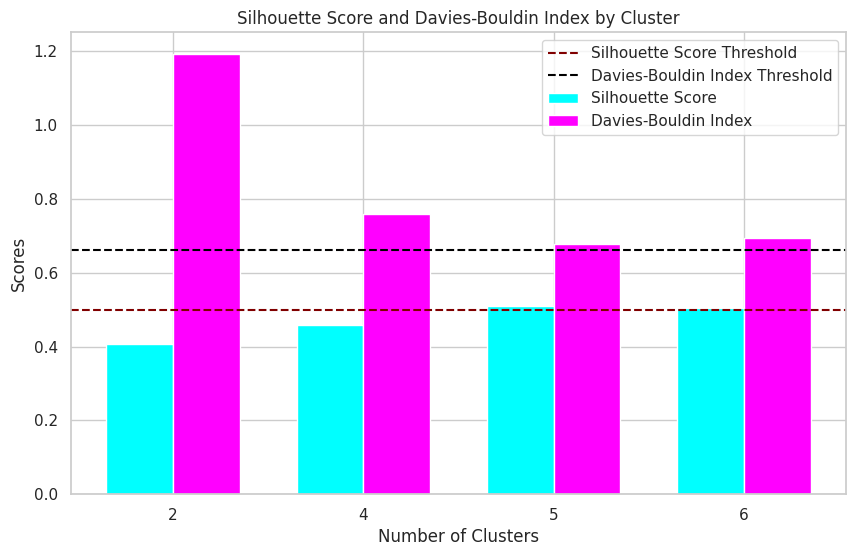

time: 1.44 s (started: 2024-03-06 13:14:05 +00:00)


In [ ]:
# Comparison of Clusters (formed using K-means) on the basis of scores

# Measure memory before plotting
%memit

# Assuming you have three sets of scores for 2, 3, and 4 clusters
num_clusters = [2, 4, 5, 6]

# Silhouette Scores
sscores = [sscore_km_2cluster, sscore_km_4cluster,
           sscore_km_5cluster, sscore_km_6cluster]

# Davies-Bouldin Index Scores
dbscores = [dbscore_km_2cluster,dbscore_km_4cluster,
            dbscore_km_5cluster, dbscore_km_6cluster]

# Thresholds
sscore_threshold = 0.5
dbscore_threshold = 0.66

# Plotting
bar_width = 0.35
index = np.arange(len(num_clusters))

fig, ax = plt.subplots(figsize=(10, 6))

# Bar for Silhouette Scores
bar1 = ax.bar(index, sscores, bar_width, label='Silhouette Score', color='cyan')

# Bar for Davies-Bouldin Index Scores
bar2 = ax.bar(index + bar_width, dbscores, bar_width, label='Davies-Bouldin Index', color='magenta')

# Horizontal lines for thresholds
ax.axhline(y=sscore_threshold, color='maroon', linestyle='--', label='Silhouette Score Threshold')
ax.axhline(y=dbscore_threshold, color='black', linestyle='--', label='Davies-Bouldin Index Threshold')

# Adding labels
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Scores')
ax.set_title('Silhouette Score and Davies-Bouldin Index by Cluster')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(num_clusters)
ax.legend()

# Measure memory after plotting
%memit

plt.show()


In [ ]:
# Track final memory usage
final_memory = memory_usage()[0]

# Calculate elapsed time
elapsed_time = time.time() - start_time
%memit

# Print total time taken and total memory used
print(f"Total time taken: {elapsed_time} seconds")

peak memory: 1343.92 MiB, increment: 0.00 MiB
Total time taken: 2181.181915283203 seconds
time: 559 ms (started: 2024-03-06 13:14:07 +00:00)


## Gaussian Mixture Model

The Gaussian Mixture Model (GMM) is a powerful technique used for clustering data points in machine learning due to following reasons:

**1. Mixture of Gaussians**

GMM assumes data is generated from a **mix of several Gaussian distributions**, each representing a distinct cluster. This allows for **flexible modeling** of complex data shapes compared to K-means, which uses rigid spherical clusters.

**2. Soft Clustering**

Unlike K-means, which assigns each data point to a single cluster with sharp boundaries, GMM uses a **probabilistic approach**. It calculates the **probability** of each data point belonging to **multiple clusters** simultaneously. This is particularly useful for data with overlapping or ambiguous clusters, where data points might share characteristics of multiple groups.

**3. Adaptability**

GMM can **adjust the shape and size** of its Gaussian distributions to better fit the data compared to K-means with its fixed spherical clusters. This allows for more **accurate modeling** of diverse data distributions.


### Methodology

In this analysis, we employed a Gaussian Mixture Model (GMM) for clustering on preprocessed data. The dataset, denoted as `df2`, underwent standardization using the `StandardScaler` from scikit-learn. Subsequently, a GMM was fitted to the standardized data to identify underlying patterns and relationships within the dataset.



In [ ]:
from memory_profiler import memory_usage
import time

#Track start time
start_time = time.time()

# Track initial memory usage
initial_memory = memory_usage()[0]

time: 104 ms (started: 2024-03-06 11:53:14 +00:00)


In [ ]:
df2 = df1.copy()
df3=df2.drop(['Cluster'],axis=1)

time: 35.4 ms (started: 2024-03-06 11:53:17 +00:00)


In [ ]:
df3.columns

Index(['hops_process_time', 'hops_bill', 'yeast_attenuation', 'yeast_temp_min',
       'yeast_temp_max', 'batch_robnorm', 'og_robnorm', 'fg_robnorm',
       'abv_robnorm', 'ibu_robnorm', 'color_robnorm', 'ph mash_robnorm',
       'rating_robnorm', 'num rating_robnorm', 'views_robnorm',
       'ferm_weight_robnorm', 'ferm_ppg_robnorm', 'ferm_bill_robnorm',
       'hops_aa_robnorm', 'hops_IBU_robnorm', 'cluster_label'],
      dtype='object')

time: 4.24 ms (started: 2024-03-06 11:53:20 +00:00)


### Model Performance

1. **Memory Usage**: The memory usage before fitting the GMM is 1148.83 MiB, and after fitting, it increases to 1182.39 MiB. This increase in memory usage indicates that the GMM is using additional memory to store the model parameters and cluster assignments.

2. **Silhouette Score**: The silhouette score measures how similar an object is to its own cluster compared to other clusters. A score closer to 1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. In this case, the silhouette score is 0.1816, which suggests that the clustering is not very well-defined, as the score is closer to 0 than to 1.

3. **Davies-Bouldin Score**: The Davies-Bouldin score is another measure of cluster quality, where lower values indicate better clustering. It is the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. The score of 3.0027 indicates that the clusters are not well-separated.

Overall, the analysis suggests that the clustering performed by the GMM may not be very effective in this case, as indicated by the low silhouette score and high Davies-Bouldin score.

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Measure memory before plotting
%memit

# DataFrame with preprocessed data:'df2'
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df2)

# Initialize and fit the Gaussian Mixture Model
n_components = 5 # You can adjust the number of components/clusters
gmm = GaussianMixture(n_components=n_components, random_state=142)
gmm.fit(X_scaled)

# Get cluster labels
cluster_labels = gmm.predict(X_scaled)

# Measure memory after plotting
%memit

peak memory: 1231.32 MiB, increment: 0.00 MiB
peak memory: 1237.84 MiB, increment: 0.19 MiB
time: 31.8 s (started: 2024-03-06 11:53:25 +00:00)


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate silhouette score
silhouette_score_value = silhouette_score(X_scaled, cluster_labels)

# Calculate Davies-Bouldin score
davies_bouldin_score_value = davies_bouldin_score(X_scaled, cluster_labels)

print("Silhouette Score:", silhouette_score_value)
print("Davies-Bouldin Score:", davies_bouldin_score_value)

In [ ]:
df3

,hops_process_time,hops_bill,yeast_attenuation,yeast_temp_min,yeast_temp_max,batch_robnorm,og_robnorm,fg_robnorm,abv_robnorm,ibu_robnorm,color_robnorm,ph mash_robnorm,rating_robnorm,num rating_robnorm,views_robnorm,ferm_weight_robnorm,ferm_ppg_robnorm,ferm_bill_robnorm,hops_aa_robnorm,hops_IBU_robnorm
0,60.0,33.0,76.0,56.0,70.0,0.034483,0.00000,0.1,-0.032544,-0.172153,-0.092444,0.000000,0.0,16.0,394.694407,-0.227285,0.0,-0.507317,-0.457944,-0.141565
1,10.0,7.0,78.0,64.0,74.0,0.034483,0.21875,0.1,0.269231,0.365084,-0.084434,0.987823,0.0,23.0,393.144611,0.106093,0.0,0.017886,0.140187,-0.089487
2,60.0,8.0,76.0,54.0,77.0,0.131034,0.00000,0.1,-0.002959,0.102402,-0.023815,1.015221,0.0,26.0,370.807640,0.151523,0.0,0.273171,0.364486,0.132274
3,0.0,8.0,75.0,54.0,77.0,0.065517,0.18750,0.4,0.103550,0.407717,-0.012990,1.036530,0.0,10.0,284.929059,0.166756,0.0,0.094309,-0.009346,-0.040098
4,90.0,28.0,75.0,60.0,72.0,0.065517,0.53125,0.6,0.443787,2.707636,-0.059970,0.000000,0.0,6.0,264.241473,0.257616,0.0,0.183740,0.364486,3.773350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171097,60.0,100.0,66.5,65.0,68.0,0.000000,-0.15625,0.0,-0.115385,-0.434431,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782
171098,60.0,100.0,65.0,65.0,78.0,0.000000,-0.15625,0.0,-0.115385,-0.434431,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782
171099,60.0,100.0,80.0,50.0,60.0,0.000000,-0.15625,0.0,-0.115385,-0.434431,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782
171100,60.0,100.0,70.0,58.0,68.0,0.000000,-0.15625,0.0,-0.115385,-0.434431,0.885473,0.000000,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782


time: 33.9 ms (started: 2024-03-06 07:58:43 +00:00)


The DataFrame displayed below the plot shows the original data along with the assigned cluster labels. This can be useful for further analysis or for understanding the characteristics of each cluster.

In [ ]:
# Create a copy of the scaled data
X_scaled_cluster = df3.copy()

# Convert cluster_labels to a NumPy array
cluster_labels_array = np.array(cluster_labels)

# Add the 'clusters' column to the DataFrame
X_scaled_cluster['cluster'] = cluster_labels_array

# Display the DataFrame
X_scaled_cluster


,hops_process_time,hops_bill,yeast_attenuation,yeast_temp_min,yeast_temp_max,batch_robnorm,og_robnorm,fg_robnorm,abv_robnorm,ibu_robnorm,...,rating_robnorm,num rating_robnorm,views_robnorm,ferm_weight_robnorm,ferm_ppg_robnorm,ferm_bill_robnorm,hops_aa_robnorm,hops_IBU_robnorm,cluster_label,cluster
0,60.0,33.0,76.0,56.0,70.0,0.034483,0.00000,0.1,-0.032544,-0.172153,...,0.0,16.0,394.694407,-0.227285,0.0,-0.507317,-0.457944,-0.141565,4,4
1,10.0,7.0,78.0,64.0,74.0,0.034483,0.21875,0.1,0.269231,0.365084,...,0.0,23.0,393.144611,0.106093,0.0,0.017886,0.140187,-0.089487,4,4
2,60.0,8.0,76.0,54.0,77.0,0.131034,0.00000,0.1,-0.002959,0.102402,...,0.0,26.0,370.807640,0.151523,0.0,0.273171,0.364486,0.132274,4,4
3,0.0,8.0,75.0,54.0,77.0,0.065517,0.18750,0.4,0.103550,0.407717,...,0.0,10.0,284.929059,0.166756,0.0,0.094309,-0.009346,-0.040098,4,4
4,90.0,28.0,75.0,60.0,72.0,0.065517,0.53125,0.6,0.443787,2.707636,...,0.0,6.0,264.241473,0.257616,0.0,0.183740,0.364486,3.773350,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171097,60.0,100.0,66.5,65.0,68.0,0.000000,-0.15625,0.0,-0.115385,-0.434431,...,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782,0,0
171098,60.0,100.0,65.0,65.0,78.0,0.000000,-0.15625,0.0,-0.115385,-0.434431,...,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782,0,0
171099,60.0,100.0,80.0,50.0,60.0,0.000000,-0.15625,0.0,-0.115385,-0.434431,...,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782,0,0
171100,60.0,100.0,70.0,58.0,68.0,0.000000,-0.15625,0.0,-0.115385,-0.434431,...,0.0,0.0,-0.135061,0.060663,0.0,0.391870,0.364486,-0.420782,0,0


time: 706 ms (started: 2024-03-06 11:35:06 +00:00)


### Cluster Profile



In [ ]:
# To segregate the centroids_df based on cluster numbers

# Selected DataFrame: df1
clusters = [0, 1, 2, 3, 4]
seg_dfs = {}

for cluster in clusters:
    seg_dfs[cluster] = X_scaled_cluster[X_scaled_cluster['cluster_label'] == cluster]

# Access segregated dataframes like segregated_dfs[0], segregated_dfs[1], etc.

time: 181 ms (started: 2024-03-06 11:49:27 +00:00)


Cluster 0 has average to above-average values for most features, indicating a cluster of beer recipes with relatively standard characteristics in terms of ingredients and brewing process. However, the wide range of values for some features like process time and batch size suggests some diversity within this cluster.


In [ ]:
seg_dfs[0].describe()

,hops_process_time,hops_bill,yeast_attenuation,yeast_temp_min,yeast_temp_max,batch_robnorm,og_robnorm,fg_robnorm,abv_robnorm,ibu_robnorm,...,rating_robnorm,num rating_robnorm,views_robnorm,ferm_weight_robnorm,ferm_ppg_robnorm,ferm_bill_robnorm,hops_aa_robnorm,hops_IBU_robnorm,cluster_label,cluster
count,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,...,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,28211.000000,28211.0,28211.0
mean,55.950799,91.781468,76.474371,60.430151,73.644323,0.570938,0.050900,0.110521,0.060002,-0.050723,...,0.068909,0.016093,0.252947,0.502323,0.046737,0.045304,-0.109003,-0.008125,0.0,0.0
std,17.902037,14.271085,5.005056,6.272725,6.580010,5.065284,0.433721,0.437804,0.416559,0.569653,...,0.562444,0.133756,1.052547,4.222263,1.149213,0.393991,0.473213,1.159845,0.0,0.0
min,0.000000,4.000000,0.000000,45.000000,48.000000,-0.682759,-1.718750,-1.800000,-1.653846,-0.434431,...,0.000000,0.000000,-0.151432,-0.545430,-15.416667,-1.234146,-1.037383,-0.420782,0.0,0.0
25%,60.000000,83.000000,74.000000,54.000000,72.000000,0.000000,-0.156250,0.000000,-0.115385,-0.434431,...,0.000000,0.000000,-0.135061,-0.121192,0.000000,-0.186992,-0.588785,-0.420782,0.0,0.0
50%,60.000000,100.000000,75.000000,62.000000,73.000000,0.000000,-0.156250,0.000000,-0.115385,-0.123583,...,0.000000,0.000000,-0.073670,0.060663,0.000000,0.159350,-0.102804,-0.086797,0.0,0.0
75%,60.000000,100.000000,80.000000,65.000000,77.000000,0.006897,0.187500,0.200000,0.174556,0.129385,...,0.000000,0.000000,0.320600,0.060663,0.250000,0.391870,0.364486,0.178362,0.0,0.0
max,999.000000,100.000000,110.000000,89.000000,113.000000,288.937931,7.375000,19.200000,5.547337,40.461144,...,5.000000,5.000000,31.863574,193.201229,18.541667,0.391870,8.308411,87.202934,0.0,0.0


time: 203 ms (started: 2024-03-06 11:50:14 +00:00)


Cluster 1 appears to have shorter average process times for hops, lower minimum yeast temperatures, and lower maximum yeast temperatures compared to other clusters. It also has a higher average batch size and a wider range of values for some features like process time and batch size.

In [ ]:
seg_dfs[1].describe()

,hops_process_time,hops_bill,yeast_attenuation,yeast_temp_min,yeast_temp_max,batch_robnorm,og_robnorm,fg_robnorm,abv_robnorm,ibu_robnorm,...,rating_robnorm,num rating_robnorm,views_robnorm,ferm_weight_robnorm,ferm_ppg_robnorm,ferm_bill_robnorm,hops_aa_robnorm,hops_IBU_robnorm,cluster_label,cluster
count,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,...,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,30323.000000,30323.0,30323.0
mean,57.569864,95.912608,76.409915,13.526729,24.195627,0.752754,0.051942,0.080507,0.064720,-0.004183,...,0.036573,0.008607,0.015050,0.741755,0.085507,0.014820,0.082217,-0.168887,1.0,1.0
std,28.777019,10.580198,4.642416,3.066094,2.929754,5.942630,0.424857,0.427817,0.415655,0.551314,...,0.407633,0.095881,0.616555,5.080294,1.061681,0.389860,0.437692,0.728603,0.0,0.0
min,0.000000,16.000000,0.000000,0.000000,0.000000,-0.751724,-1.687500,-2.500000,-1.647929,-0.434431,...,0.000000,0.000000,-0.192360,-0.545430,-15.416667,-1.232520,-1.037383,-0.420782,1.0,1.0
25%,60.000000,100.000000,75.000000,12.000000,23.000000,-0.027586,-0.156250,-0.100000,-0.115385,-0.368119,...,0.000000,0.000000,-0.171896,-0.177980,0.000000,-0.226829,-0.364486,-0.420782,1.0,1.0
50%,60.000000,100.000000,75.000000,12.000000,25.000000,0.000000,-0.093750,0.000000,-0.088757,-0.071101,...,0.000000,0.000000,-0.135061,0.060663,0.000000,0.108943,0.364486,-0.420782,1.0,1.0
75%,60.000000,100.000000,79.000000,15.000000,25.000000,0.065517,0.218750,0.200000,0.224852,0.170197,...,0.000000,0.000000,-0.058663,0.121325,0.416667,0.391870,0.364486,0.011002,1.0,1.0
max,4320.000000,100.000000,127.000000,35.000000,45.000000,257.082759,5.625000,7.500000,5.387574,47.917026,...,5.000000,3.000000,26.800819,206.563068,18.541667,0.391870,5.224299,49.544254,1.0,1.0


time: 196 ms (started: 2024-03-06 11:51:15 +00:00)


Cluster 2 has significantly higher average process times for hops and a wider range of values for most features compared to other clusters. This cluster also shows higher average values for batch size and some other features, indicating potentially different brewing characteristics compared to other clusters.

In [ ]:
seg_dfs[2].describe()

,hops_process_time,hops_bill,yeast_attenuation,yeast_temp_min,yeast_temp_max,batch_robnorm,og_robnorm,fg_robnorm,abv_robnorm,ibu_robnorm,...,rating_robnorm,num rating_robnorm,views_robnorm,ferm_weight_robnorm,ferm_ppg_robnorm,ferm_bill_robnorm,hops_aa_robnorm,hops_IBU_robnorm,cluster_label,cluster
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,2.000000e+01,20.0,20.0
mean,14328.000000,23.300000,76.325000,52.400000,63.500000,3.221897,0.382813,0.445000,0.314497,0.166399,...,0.200000,0.050000,1.737858,-0.050668,0.083333,-0.166016,-0.190187,-4.207824e-01,2.0,2.0
std,10441.371961,20.708757,3.606555,20.391949,20.301672,14.495361,0.629741,0.750772,0.615802,0.389020,...,0.894427,0.223607,3.468184,0.370785,0.372678,0.447573,0.315889,5.695324e-17,0.0,0.0
min,7200.000000,6.000000,70.000000,12.000000,22.000000,-0.372414,-0.375000,-0.800000,-0.378698,-0.259714,...,0.000000,0.000000,0.680764,-0.515099,-1.250000,-1.138211,-0.710280,-4.207824e-01,2.0,2.0
25%,10080.000000,13.750000,73.750000,54.000000,69.500000,-0.065517,-0.031250,-0.100000,-0.118343,-0.055147,...,0.000000,0.000000,0.795703,-0.324258,0.000000,-0.330488,-0.488318,-4.207824e-01,2.0,2.0
50%,10080.000000,16.500000,76.500000,63.000000,72.000000,0.000000,0.281250,0.300000,0.158284,0.019833,...,0.000000,0.000000,0.821282,-0.069148,0.000000,0.016260,-0.163551,-4.207824e-01,2.0,2.0
75%,11160.000000,22.750000,79.125000,64.250000,74.000000,0.065517,0.710938,0.600000,0.592456,0.224804,...,0.000000,0.000000,1.168145,0.076162,0.416667,0.155691,-0.014019,-4.207824e-01,2.0,2.0
max,43200.000000,100.000000,81.500000,68.000000,78.000000,64.800000,2.218750,2.200000,2.011834,1.234620,...,4.000000,1.000000,16.402456,0.977819,0.416667,0.343089,0.364486,-4.207824e-01,2.0,2.0


time: 208 ms (started: 2024-03-06 11:51:22 +00:00)


Cluster 3 has relatively low average values for hops process time, bill, and most other features compared to other clusters. This cluster also shows lower average values for batch size and some other features, indicating potentially different brewing characteristics compared to other clusters.

In [ ]:
seg_dfs[3].describe()

,hops_process_time,hops_bill,yeast_attenuation,yeast_temp_min,yeast_temp_max,batch_robnorm,og_robnorm,fg_robnorm,abv_robnorm,ibu_robnorm,...,rating_robnorm,num rating_robnorm,views_robnorm,ferm_weight_robnorm,ferm_ppg_robnorm,ferm_bill_robnorm,hops_aa_robnorm,hops_IBU_robnorm,cluster_label,cluster
count,46833.000000,46833.000000,46833.000000,46833.000000,46833.00000,46833.000000,46833.000000,46833.000000,46833.000000,46833.000000,...,46833.000000,46833.000000,46833.000000,46833.000000,46833.000000,46833.000000,46833.000000,46833.000000,46833.0,46833.0
mean,50.638951,26.735037,77.184429,14.391775,23.71614,0.962650,0.155621,0.156394,0.141227,0.147395,...,0.082784,0.019965,0.300491,0.807490,0.096526,-0.128279,-0.074408,0.153651,3.0,3.0
std,22.522242,16.292418,5.261568,3.505071,3.32754,6.799411,2.198075,1.464028,0.482731,0.509519,...,0.609717,0.150470,1.869623,6.469025,1.317895,0.373926,0.450426,0.510942,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.00000,-0.682759,-1.718750,-1.600000,-1.653846,-0.434431,...,0.000000,0.000000,-0.165075,-0.545430,-15.416667,-1.234146,-1.037383,-0.420782,3.0,3.0
25%,45.000000,12.000000,75.000000,12.000000,22.00000,-0.065517,-0.156250,-0.200000,-0.159763,-0.114679,...,0.000000,0.000000,-0.100955,-0.224746,0.000000,-0.382114,-0.383178,-0.116626,3.0,3.0
50%,60.000000,25.000000,76.500000,12.000000,25.00000,0.000000,0.062500,0.100000,0.053254,0.037777,...,0.000000,0.000000,0.035471,-0.010957,0.000000,-0.052033,-0.028037,0.063570,3.0,3.0
75%,60.000000,40.000000,81.000000,18.000000,25.00000,0.110345,0.343750,0.400000,0.343195,0.293308,...,0.000000,0.000000,0.399727,0.181855,0.416667,0.159350,0.261682,0.309291,3.0,3.0
max,270.000000,66.000000,120.000000,77.000000,45.00000,268.248276,463.812500,296.200000,5.689349,19.976255,...,5.000000,5.000000,235.563438,382.805719,18.541667,0.391870,8.308411,46.425917,3.0,3.0


time: 220 ms (started: 2024-03-06 11:51:33 +00:00)


Cluster 4 has relatively average values for hops process time, bill, and most other features compared to other clusters. This cluster also shows average values for batch size and some other features, indicating a moderate brewing profile compared to other clusters.

In [ ]:
seg_dfs[4].describe()

,hops_process_time,hops_bill,yeast_attenuation,yeast_temp_min,yeast_temp_max,batch_robnorm,og_robnorm,fg_robnorm,abv_robnorm,ibu_robnorm,...,rating_robnorm,num rating_robnorm,views_robnorm,ferm_weight_robnorm,ferm_ppg_robnorm,ferm_bill_robnorm,hops_aa_robnorm,hops_IBU_robnorm,cluster_label,cluster
count,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,...,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,65715.000000,65715.0,65715.0
mean,50.795587,26.155261,76.409123,60.484958,73.447615,0.977654,0.153386,0.160781,0.146593,0.153272,...,0.116077,0.030100,0.553349,0.700885,0.087662,-0.133047,-0.069456,0.156824,4.0,4.0
std,22.697566,15.745071,5.028316,6.233557,6.356610,7.139431,0.499172,0.534862,0.488753,0.550449,...,0.720786,0.252644,4.669239,5.458395,1.363431,0.372505,0.447288,0.495702,0.0,0.0
min,0.000000,0.000000,0.000000,43.000000,48.000000,-0.682759,-1.718750,-2.300000,-1.653846,-0.434431,...,0.000000,0.000000,-0.151432,-0.545430,-15.416667,-1.234146,-1.037383,-0.420782,4.0,4.0
25%,45.000000,12.000000,74.000000,54.000000,72.000000,-0.065517,-0.156250,-0.200000,-0.156805,-0.113060,...,0.000000,0.000000,-0.060027,-0.214458,0.000000,-0.382114,-0.383178,-0.112714,4.0,4.0
50%,60.000000,25.000000,75.000000,62.000000,73.000000,0.000000,0.062500,0.100000,0.050296,0.038721,...,0.000000,0.000000,0.189632,-0.010957,0.000000,-0.052033,-0.009346,0.064792,4.0,4.0
75%,60.000000,39.000000,80.000000,65.000000,77.000000,0.110345,0.375000,0.400000,0.355030,0.297356,...,0.000000,0.000000,0.538881,0.181855,0.416667,0.149593,0.271028,0.311491,4.0,4.0
max,601.000000,63.000000,112.000000,95.000000,113.000000,403.931034,13.906250,42.500000,5.710059,37.966271,...,5.000000,26.000000,394.694407,236.627205,39.583333,0.391870,8.308411,42.408068,4.0,4.0


time: 206 ms (started: 2024-03-06 11:51:47 +00:00)


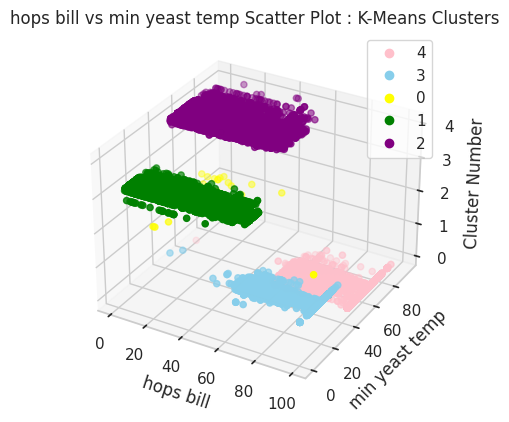

time: 9.84 s (started: 2024-03-06 11:35:09 +00:00)


In [ ]:

from matplotlib.colors import ListedColormap  # Import ListedColormap
# Create a custom colormap with pink, sky blue, and yellow
custom_cmap = ListedColormap(['pink', 'skyblue', 'yellow','green','purple'])

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define cluster labels
cluster_labels = list(X_scaled_cluster['cluster'].unique())

# Plot the clustered data in 3D
scatter_plot = ax.scatter(xs=X_scaled_cluster['hops_bill'],
                          ys=X_scaled_cluster['yeast_temp_min'],
                          zs=X_scaled_cluster['cluster'],  # Use cluster_number for the z-axis
                          c=X_scaled_cluster['cluster'],
                          cmap=custom_cmap)  # Use custom colormap

# Set labels and title
ax.set_xlabel('hops bill')
ax.set_ylabel('min yeast temp ')
ax.set_zlabel('Cluster Number')
ax.set_title('hops bill vs min yeast temp Scatter Plot : K-Means Clusters')

# Add legend
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)

# Show grid
ax.grid()

# Show plot
plt.show()

In [ ]:
# Track final memory usage
final_memory = memory_usage()[0]

# Calculate elapsed time
elapsed_time = time.time() - start_time
%memit

# Print total time taken and total memory used
print(f"Total time taken: {elapsed_time} seconds")

peak memory: 1177.94 MiB, increment: 0.00 MiB
Total time taken: 222.24615168571472 seconds
time: 461 ms (started: 2024-03-06 11:35:26 +00:00)


# **Comparative Analysis**

**K-Means:**

1. **Silhouette Score (SS):** 0.5081 for 5 clusters.
2. **Davies-Bouldin Index (DBI):** 0.6776 for 5 clusters.
3. **Memory Usage:** 1343.92 MiB before fitting, no change after fitting.
4. **Total time taken:** 2181.18 seconds.

**Gaussian Mixture Model (GMM):**

1. **Silhouette Score:** 0.1816.
2. **Davies-Bouldin Score:** 3.0027.
3. **Memory Usage:** 1148.83 MiB before fitting, 1182.39 MiB after fitting.
4. **Total time taken:** 222.25 seconds.

**Comparison:**

1. **Silhouette Score:** K-Means has a higher silhouette score (0.5081) compared to GMM (0.1816), indicating better-defined clusters in K-Means.

2. **Davies-Bouldin Index:** K-Means has a lower Davies-Bouldin Index (0.6776) compared to GMM (3.0027), indicating better clustering quality in K-Means.

3. **Memory Usage:** Both algorithms show similar memory usage, with K-Means using 1343.92 MiB and GMM using 1148.83 MiB before fitting.

4. **Total Time Taken:** K-Means took longer to complete the entire process (2181.18 seconds) compared to GMM (222.25 seconds).

In summary, K-Means outperforms GMM in terms of silhouette score and Davies-Bouldin index, indicating better clustering quality. However, K-Means also consumes more memory and takes longer to complete compared to GMM. The choice between the two algorithms depends on the specific requirements of the clustering task, such as the importance of clustering quality versus computational resources.

# **Conclusion**

Our analysis revealed that K-Means performed better than GMM in terms of clustering quality, as evidenced by higher Silhouette Score and lower Davies-Bouldin Index. K-Means produced well-defined clusters, indicating that recipes within the same cluster are more similar to each other than to recipes in other clusters. On the other hand, GMM showed poorer clustering quality, with clusters that were not well-separated.

Additionally, we observed that K-Means consumed more memory and took longer to complete compared to GMM. This suggests that while K-Means may offer better clustering quality, it comes at the cost of increased computational resources.

# **Managerial Insights**

1. **Recipe Categorization:** Clustering beer recipes can help categorize them into distinct groups based on their ingredients and characteristics. This can be useful for breweries and homebrewers to identify trends and patterns in recipes.

2. **Product Development:** Understanding the clustering of beer recipes can aid in new product development. Breweries can use this information to create new recipes that align with popular trends or fill gaps in the market.

3. **Marketing and Sales:** Clustering can also be leveraged for marketing and sales strategies. Breweries can target specific clusters with tailored marketing campaigns or promotions based on the preferences of each cluster.

4. **Quality Control:** Clustering can assist breweries in maintaining quality control by identifying outlier recipes that deviate significantly from the norm. This can help in ensuring consistent quality across batches.

5. **Customer Insights:** Analyzing clusters can provide insights into customer preferences and trends. Breweries can use this information to create products that resonate with their target audience.



